In [ ]:
!pip install -U imbalanced-learn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 199 kB 32.4 MB/s 
     |████████████████████████████████| 199 kB 65.1 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import math


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# ROC Curve AUC
from sklearn.metrics import roc_auc_score, roc_curve

# PRC Curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve, auc, f1_score


import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

import os, sys
import copy
import pickle
from IPython.display import clear_output


from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import RandomUnderSampler 

deviceR = 'gpu'

### Define some functions

In [48]:
# Function to load data
class creditcardDataset():
    def __init__(self):
        df = pd.read_csv('./creditcard_sample.csv')
        X_data = df.iloc[:, df.columns != 'Class']
        self.labels = X_data.keys()
        self.X = np.float32(X_data.values)
        self.y = df['Class'].values
        self.n_samples, self.n_features = self.X.shape

# Count the percentage of fraud and non fraud from dataset        
def percentage_fraud_nonFraud(x):
    fraud = (np.count_nonzero(x) * 100) / x.size 
    non_fraud = ((x.size - np.count_nonzero(x)) * 100) / x.size 
    return round(fraud, 2), round(non_fraud, 2), np.count_nonzero(x), (x.size - np.count_nonzero(x))

# Plot the data histogram    
def plot_data_histogram(obj):
    for i in range(obj.n_features):
        sns.histplot(obj.X[:,i], kde=True)
        plt.title(obj.labels[i])
        plt.show()
        
def plot_datasetBars(y_train, y_test):
    x_train_labels = ['Fraud Train', 'Non-fraud Train'] 
    x_test_labels =['Fraud Test', 'Non-fraud Test']
    y_train_data = [np.count_nonzero(y_train), len(y_train) - np.count_nonzero(y_train)] 
    y_test_data = [np.count_nonzero(y_test), len(y_test) - np.count_nonzero(y_test)]
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.set_title('Fraud / Non-fraud dataset distribution')
    ax.bar(x_train_labels, y_train_data, color = 'b')
    ax.bar(x_test_labels, y_test_data, color = 'r')
    plt.show()

### Prepare Data and Scale Data

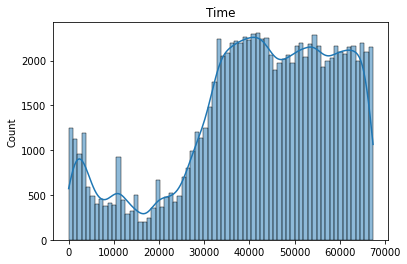

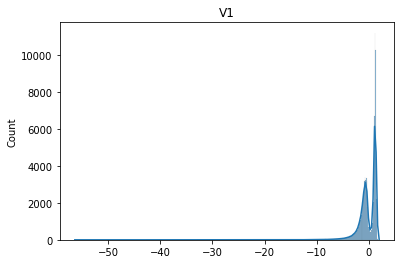

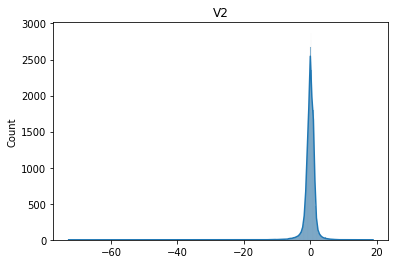

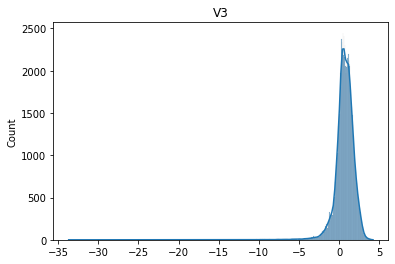

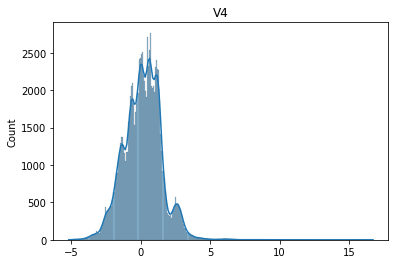

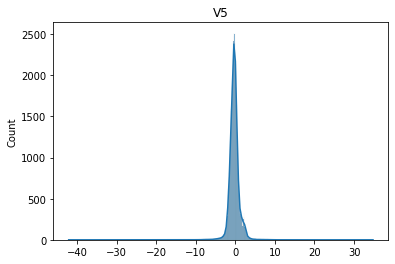

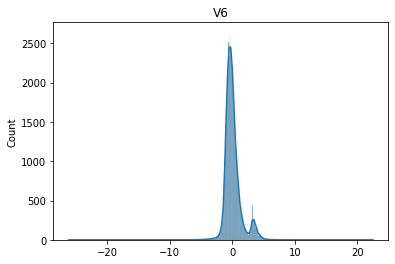

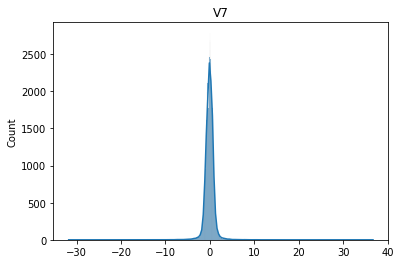

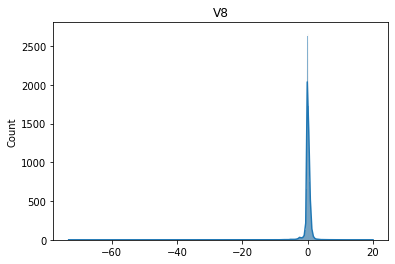

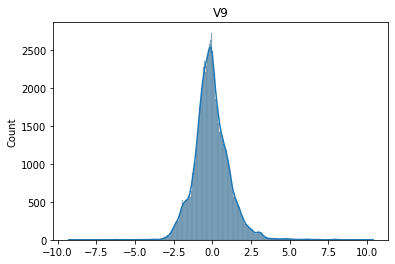

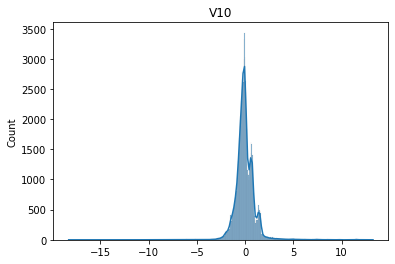

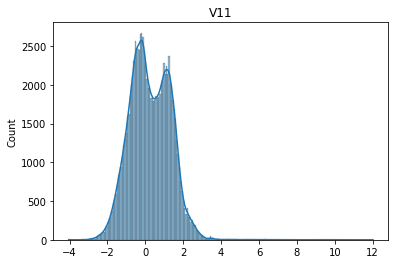

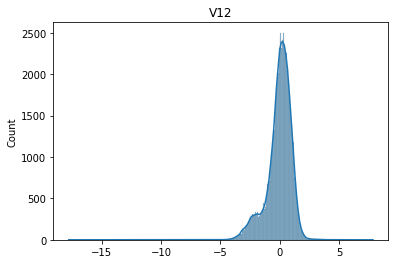

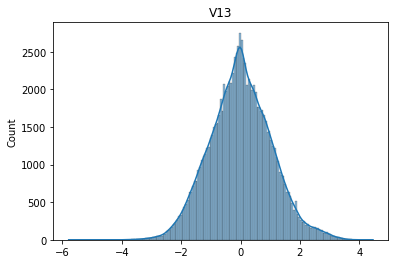

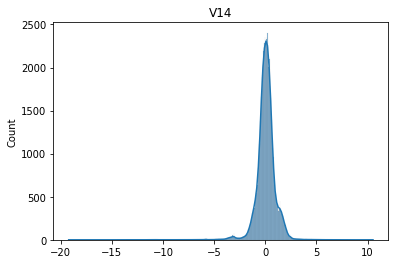

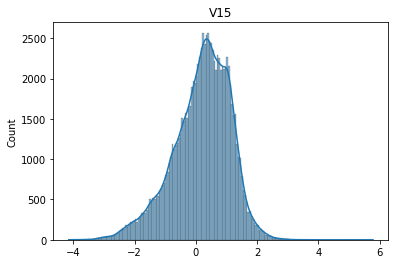

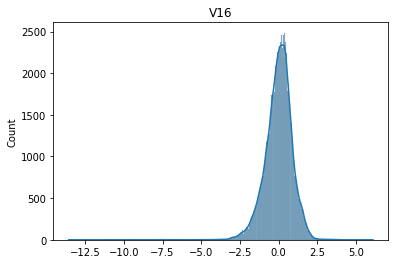

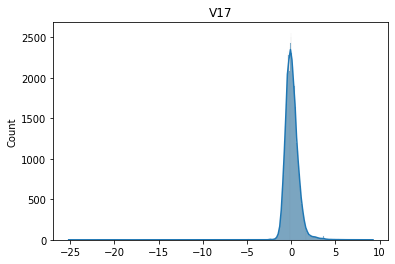

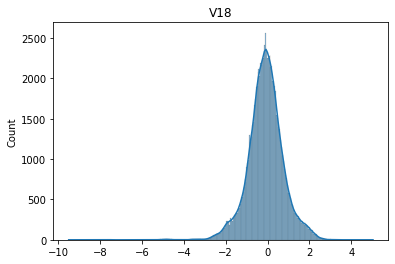

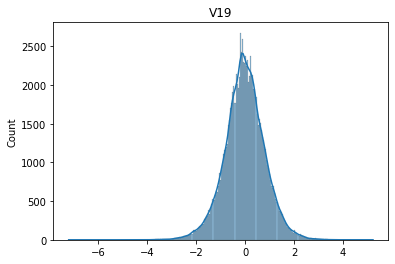

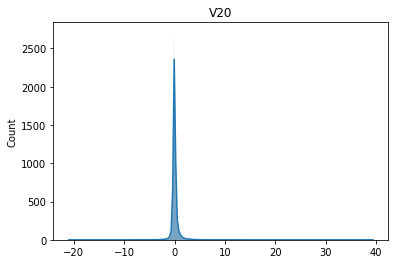

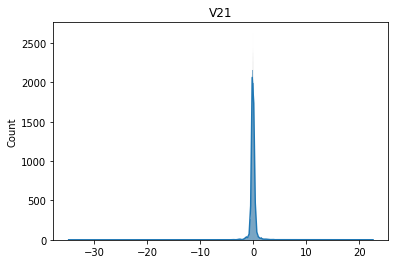

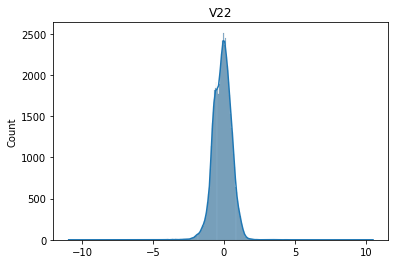

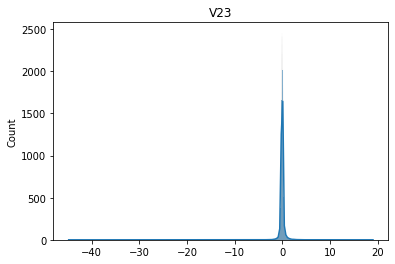

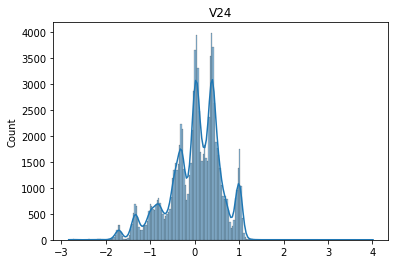

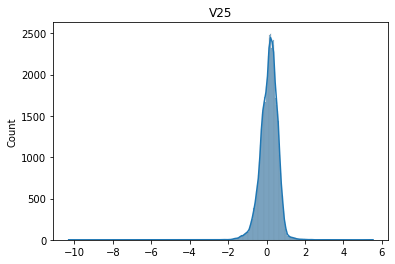

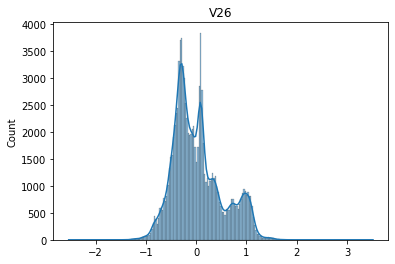

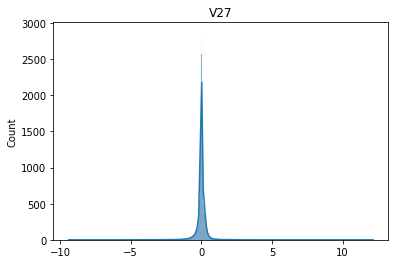

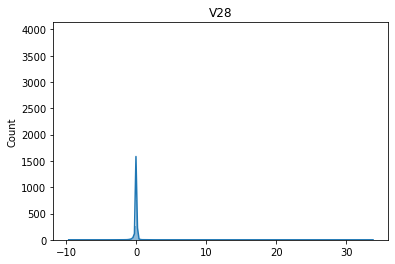

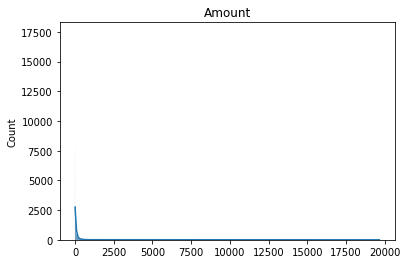

Train Dataset ->  fraud : 181 -> 0.23% non-fraud :79818 99.77%
Test Dataset  ->  fraud : 42 -> 0.21% non-fraud : 19958 99.79%


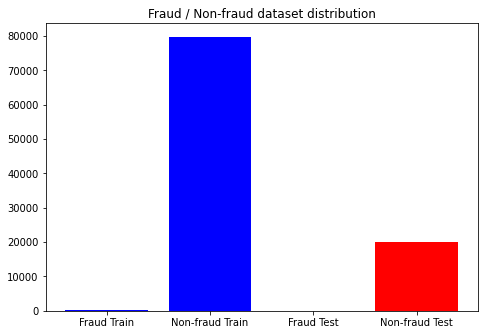

In [49]:
dataset = creditcardDataset()

plot_data_histogram(dataset)

# Split dataset into train and test test_size = 20%, train_size = 80%
X_train, X_test, y_train, y_test = train_test_split(dataset.X, dataset.y, test_size= 0.2, shuffle= True, random_state = 1234 )

n_samples_train, n_features_train = X_train.shape
n_samples_test, n_features_test = X_test.shape

y_train = np.reshape(y_train, (n_samples_train, ))
y_test = np.reshape(y_test, (n_samples_test, ))

# verify percentage of fraud
train_fraud_percentage = percentage_fraud_nonFraud(y_train)
test_fraud_percentage = percentage_fraud_nonFraud(y_test)

print(f'Train Dataset ->  fraud : {train_fraud_percentage[2]} -> {train_fraud_percentage[0]}% non-fraud :{train_fraud_percentage[3]} {train_fraud_percentage[1]}%')
print(f'Test Dataset  ->  fraud : {test_fraud_percentage[2]} -> {test_fraud_percentage[0]}% non-fraud : {test_fraud_percentage[3]} {test_fraud_percentage[1]}%')

plot_datasetBars(y_train, y_test)

# Scale data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(dataset.X.shape)

(99999, 30)


#  i)
Logistic regression (LR), support vector machine (SVM), and random forest (RF) are supervised machine learning algorithms that can be used for classification tasks

# Logistic regression (LR)

In [ ]:
class Logistic_Regresion():
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.model = self.train()
        self.predicted = self.test()
        self.accuracy = self.accuracy()
        self.plot_Confusion_Matrix()
        print(classification_report( self.y_test, self.predicted, target_names=['no fraud', 'fraud']))
        
    def train(self):
        # define model
        model = LogisticRegression(max_iter = 10000)
        model.fit(self.X_train, self.y_train)
        return model
        
    def test(self):
        return self.model.predict(self.X_test)
        
    def accuracy(self):
        tn, fp, fn, tp = confusion_matrix(self.y_test, self.predicted, labels=[0, 1]).ravel()
        accuracy = (tp + tn) / (tn + fp + fn + tp)
        print(f'accuracy = {(accuracy * 100):.4}%')
        return accuracy
    
    def plot_Confusion_Matrix(self):
        target_names = ['no fraud', 'fraud']
        labels = [0, 1]
        confusion_Matrix = confusion_matrix(self.y_test, self.predicted, labels= labels)
        
        sns.heatmap(confusion_Matrix, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
        xticklabels=labels, yticklabels=labels)
        plt.xlabel('Predicted')
        plt.ylabel('Ground Truth')
        plt.title(f"Confusion Matrix Logistic Regresion approach")
        plt.show()

accuracy = 99.88%


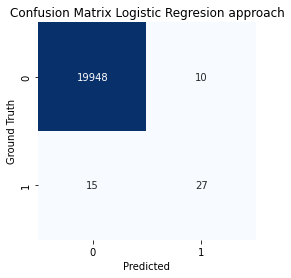

              precision    recall  f1-score   support

    no fraud       1.00      1.00      1.00     19958
       fraud       0.73      0.64      0.68        42

    accuracy                           1.00     20000
   macro avg       0.86      0.82      0.84     20000
weighted avg       1.00      1.00      1.00     20000



In [ ]:
logisticRegression = Logistic_Regresion(X_train, y_train, X_test, y_test)

# Support Vector Machine (SVM)

In [ ]:
class Support_Vector_Machine():
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.model = self.train()
        self.predicted = self.test()
        self.accuracy = self.accuracy()
        self.plot_Confusion_Matrix()
        print(classification_report( self.y_test, self.predicted, target_names=['no fraud', 'fraud']))
        
    def train(self):
        # define model
        model = SVC()
        model.fit(self.X_train, self.y_train)
        return model
        
    def test(self):
        return self.model.predict(self.X_test)
        
    def accuracy(self):
        tn, fp, fn, tp = confusion_matrix(self.y_test, self.predicted, labels=[0, 1]).ravel()
        accuracy = (tp + tn) / (tn + fp + fn + tp)
        print(f'accuracy = {(accuracy * 100):.4}%')
        return accuracy
    
    def plot_Confusion_Matrix(self):
        target_names = ['no fraud', 'fraud']
        labels = [0, 1]
        confusion_Matrix = confusion_matrix(self.y_test, self.predicted, labels= labels)
        sns.heatmap(confusion_Matrix, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
        xticklabels=labels, yticklabels=labels)
        plt.xlabel('Predicted')
        plt.ylabel('Ground Truth')
        plt.title(f"Confusion SVM approach")
        plt.show()

accuracy = 99.93%


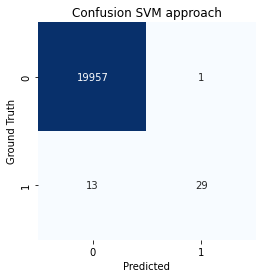

              precision    recall  f1-score   support

    no fraud       1.00      1.00      1.00     19958
       fraud       0.97      0.69      0.81        42

    accuracy                           1.00     20000
   macro avg       0.98      0.85      0.90     20000
weighted avg       1.00      1.00      1.00     20000

SVC()


In [ ]:
SVM = Support_Vector_Machine(X_train, y_train, X_test, y_test)
print(SVM.model)

# Random Forest

In [ ]:
class Random_Forest():
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.model = self.train()
        self.predicted = self.test()
        self.accuracy = self.accuracy()
        self.plot_Confusion_Matrix()
        print(classification_report( self.y_test, self.predicted, target_names=['no fraud', 'fraud']))
        
    def train(self):
        # define model
        model = RandomForestClassifier()
        model.fit(self.X_train, self.y_train)
        return model
        
    def test(self):
        return self.model.predict(self.X_test)
        
    def accuracy(self):
        tn, fp, fn, tp = confusion_matrix(self.y_test, self.predicted, labels=[0, 1]).ravel()
        accuracy = (tp + tn) / (tn + fp + fn + tp)
        print(f'accuracy = {(accuracy * 100):.4}%')
        return accuracy
    
    def plot_Confusion_Matrix(self):
        target_names = ['no fraud', 'fraud']
        labels = [0, 1]
        confusion_Matrix = confusion_matrix(self.y_test, self.predicted, labels= labels)
        sns.heatmap(confusion_Matrix, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
        xticklabels=labels, yticklabels=labels)
        plt.xlabel('Predicted')
        plt.ylabel('Ground Truth')
        plt.title(f"Confusion Matrix: Random Forest approach")
        plt.show()

accuracy = 99.96%


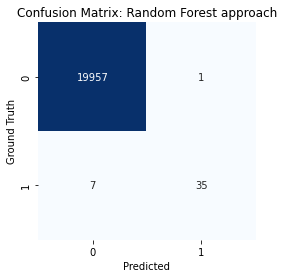

              precision    recall  f1-score   support

    no fraud       1.00      1.00      1.00     19958
       fraud       0.97      0.83      0.90        42

    accuracy                           1.00     20000
   macro avg       0.99      0.92      0.95     20000
weighted avg       1.00      1.00      1.00     20000

RandomForestClassifier()


In [ ]:
RF = Random_Forest(X_train, y_train, X_test, y_test)
print(RF.model)

# 2. DNN models

In [50]:
class DNN1(nn.Module):
    def __init__(self, input_size, num_classes):
        super(DNN1, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, 32)
        self.act1 = nn.ReLU()
        self.l2 = nn.Linear(32, 32)
        self.act2 = nn.ReLU()
        self.l3 = nn.Linear(32, 32)
        self.act3 = nn.ReLU()
        self.l4 = nn.Linear(32, num_classes)
        self.act_out = nn.Sigmoid()
        nn.init.xavier_normal_(self.l1.weight)
        nn.init.xavier_normal_(self.l2.weight)
        nn.init.xavier_normal_(self.l3.weight)
        nn.init.xavier_normal_(self.l4.weight)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.act1(out)
        out = self.l2(out)
        out = self.act2(out)
        out = self.l3(out)
        out = self.act3(out)
        out = self.l4(out)
        out = self.act_out(out)
        return out


class DNN2(nn.Module):
    def __init__(self, input_size, num_classes):
        super(DNN2, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, 32)
        self.act1 = nn.ReLU()
        self.l2 = nn.Linear(32, 64)
        self.act2 = nn.ReLU()
        self.l3 = nn.Linear(64, 32)
        self.act3 = nn.ReLU()
        self.l4 = nn.Linear(32, num_classes)
        self.act_out = nn.Sigmoid()
        nn.init.xavier_normal_(self.l1.weight)
        nn.init.xavier_normal_(self.l2.weight)
        nn.init.xavier_normal_(self.l3.weight)
        nn.init.xavier_normal_(self.l4.weight)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.act1(out)
        out = self.l2(out)
        out = self.act2(out)
        out = self.l3(out)
        out = self.act3(out)
        out = self.l4(out)
        out = self.act_out(out)
        
        return out
    

class DNN3(nn.Module):
    def __init__(self, input_size, num_classes):
        super(DNN3, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, 32)
        self.act1 = nn.ReLU()
        self.l2 = nn.Linear(32, 32)
        self.act2 = nn.ReLU()
        self.l3 = nn.Linear(32, 32)
        self.act3 = nn.ReLU()
        self.l4 = nn.Linear(32, 32)
        self.act4 = nn.ReLU()
        self.l5 = nn.Linear(32, num_classes)
        self.act_out = nn.Sigmoid()
        nn.init.xavier_normal_(self.l1.weight)
        nn.init.xavier_normal_(self.l2.weight)
        nn.init.xavier_normal_(self.l3.weight)
        nn.init.xavier_normal_(self.l4.weight)
        nn.init.xavier_normal_(self.l5.weight)
        
    def forward(self, x):
        out = self.l1(x)
        out = self.act1(out)
        out = self.l2(out)
        out = self.act2(out)
        out = self.l3(out)
        out = self.act3(out)
        out = self.l4(out)
        out = self.act4(out)
        out = self.l5(out)
        out = self.act_out(out)
        
        return out
    
    
class DNN4(nn.Module):
    def __init__(self, input_size, num_classes):
        super(DNN4, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, 32)
        self.act1 = nn.ReLU()
        self.l2 = nn.Linear(32, 64)
        self.act2 = nn.ReLU()
        self.l3 = nn.Linear(64, 128)
        self.act3 = nn.ReLU()
        self.l4 = nn.Linear(128, 128)
        self.act4 = nn.ReLU()
        self.l5 = nn.Linear(128, num_classes)
        self.act_out = nn.Sigmoid()
        nn.init.xavier_normal_(self.l1.weight)
        nn.init.xavier_normal_(self.l2.weight)
        nn.init.xavier_normal_(self.l3.weight)
        nn.init.xavier_normal_(self.l4.weight)
        nn.init.xavier_normal_(self.l5.weight)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.act1(out) 
        out = self.l2(out)
        out = self.act2(out)
        out = self.l3(out)
        out = self.act3(out)
        out = self.l4(out)
        out = self.act4(out)
        out = self.l5(out)
        out = self.act_out(out)
        
        return out   
    
    
    
class DNN5(nn.Module):
    def __init__(self, input_size, num_classes):
        super(DNN5, self).__init__()
        self.input_size = input_size  
        self.l1 = nn.Linear(input_size, 32)
        self.act1 = nn.ReLU()
        self.l2 = nn.Linear(32, 64)
        self.act2 = nn.ReLU()
        self.l3 = nn.Linear(64, 128)
        self.act3 = nn.ReLU()
        self.l4 = nn.Linear(128, 64)
        self.act4 = nn.ReLU()
        self.l5 = nn.Linear(64, 32)
        self.act5 = nn.ReLU()
        self.l6 = nn.Linear(32, num_classes)
        self.act_out = nn.Sigmoid()
        nn.init.xavier_normal_(self.l1.weight)
        nn.init.xavier_normal_(self.l2.weight)
        nn.init.xavier_normal_(self.l3.weight)
        nn.init.xavier_normal_(self.l4.weight)
        nn.init.xavier_normal_(self.l5.weight)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.act1(out)
        out = self.l2(out)
        out = self.act2(out)
        out = self.l3(out)
        out = self.act3(out)
        out = self.l4(out)
        out = self.act4(out)
        out = self.l5(out)
        out = self.act5(out)
        out = self.l6(out)
        out = self.act_out(out)
        
        return out
    
    
class DNN6(nn.Module):
    def __init__(self, input_size, num_classes):
        super(DNN6, self).__init__()
        self.input_size = input_size
        
        self.l1 = nn.Linear(input_size, 32)
        self.act1 = nn.ReLU()
        self.drop1 = nn.Dropout(p=0.2)
        
        self.l2 = nn.Linear(32, 32)
        self.act2 = nn.ReLU()
        self.drop2 = nn.Dropout(p=0.2)
        
        self.l3 = nn.Linear(32, 32)
        self.act3 = nn.ReLU()
        self.drop3 = nn.Dropout(p=0.2)
        
        self.l4 = nn.Linear(32, num_classes)
        self.act_out = nn.Sigmoid()
        
        nn.init.xavier_normal_(self.l1.weight)
        nn.init.xavier_normal_(self.l2.weight)
        nn.init.xavier_normal_(self.l3.weight)
        nn.init.xavier_normal_(self.l4.weight)
      
        
        
    def forward(self, x):
        out = self.l1(x)
        out = self.act1(out)
        out = self.drop1(out)
        
        out = self.l2(out)
        out = self.act2(out)
        out = self.drop2(out)
        
        out = self.l3(out)
        out = self.act3(out)
        out = self.drop3(out)
        
        out = self.l4(out)
        out = self.act_out(out)

        return out  
    


    
class DNN7(nn.Module):
    def __init__(self, input_size, num_classes):
        super(DNN7, self).__init__()
        self.input_size = input_size
        
        self.l1 = nn.Linear(input_size, math.ceil(64))
        self.act1 = nn.ReLU()
        self.drop1 = nn.Dropout(p=0.2)
        
        self.l2 = nn.Linear(64, 128)
        self.act2 = nn.ReLU()
        self.drop2 = nn.Dropout(p=0.2)
        
        self.l3 = nn.Linear(128, 128)
        self.act3 = nn.ReLU()
        self.drop3 = nn.Dropout(p=0.2)
        
        self.l4 = nn.Linear(128, 128)
        self.act4 = nn.ReLU()
        self.drop4 = nn.Dropout(p=0.2)
        
        self.l5 = nn.Linear(128, 64)
        self.act5 = nn.ReLU()
        self.drop5 = nn.Dropout(p=0.2)
        
        self.l6 = nn.Linear(64, 32)
        self.act6 = nn.ReLU()
        self.drop6 = nn.Dropout(p=0.2)
        
        self.l7 = nn.Linear(32, num_classes)
        self.act_out = nn.Sigmoid()
        
        nn.init.xavier_normal_(self.l1.weight)
        nn.init.xavier_normal_(self.l2.weight)
        nn.init.xavier_normal_(self.l3.weight)
        nn.init.xavier_normal_(self.l4.weight)
        nn.init.xavier_normal_(self.l5.weight)
        nn.init.xavier_normal_(self.l6.weight)
        nn.init.xavier_normal_(self.l7.weight)
        
        
    def forward(self, x):
        out = self.l1(x)
        
        out = self.act1(out)
        out = self.drop1(out)
        
        out = self.l2(out)
        out = self.act2(out)
        out = self.drop2(out)
        
        out = self.l3(out)
        out = self.act3(out)
        out = self.drop3(out)
        
        out = self.l4(out)
        out = self.act4(out)
        out = self.drop4(out)
        
        out = self.l5(out)
        out = self.act5(out)
        out = self.drop5(out)
        
        out = self.l6(out)
        out = self.act6(out)
        out = self.drop6(out)
        
        out = self.l7(out)
        out = self.act_out(out)

        return out
 
    
    
class DNN8(nn.Module):
    def __init__(self, input_size, num_classes):
        super(DNN8, self).__init__()
        self.input_size = input_size
        
        self.l1 = nn.Linear(input_size, 32)
        self.norm1 = nn.BatchNorm1d(32)
        self.act1 = nn.ReLU()
        self.drop1 = nn.Dropout(p=0.2)
        
        self.l2 = nn.Linear(32, 32)
        self.norm2 = nn.BatchNorm1d(32)
        self.act2 = nn.ReLU()
        self.drop2 = nn.Dropout(p=0.2)
        
        self.l3 = nn.Linear(32, 32)
        self.norm3 = nn.BatchNorm1d(32)
        self.act3 = nn.ReLU()
        self.drop3 = nn.Dropout(p=0.2)
        
        self.l4 = nn.Linear(32, num_classes)
        self.act_out = nn.Sigmoid()
        
        nn.init.xavier_normal_(self.l1.weight)
        nn.init.xavier_normal_(self.l2.weight)
        nn.init.xavier_normal_(self.l3.weight)
        nn.init.xavier_normal_(self.l4.weight)
       
        
    def forward(self, x):
        out = self.l1(x)
        
        out = self.norm1(out)
        out = self.act1(out)
        out = self.drop1(out)
        
        out = self.l2(out)
        out = self.norm2(out)
        out = self.act2(out)
        out = self.drop2(out)
        
        out = self.l3(out)
        out = self.norm3(out)
        out = self.act3(out)
        out = self.drop3(out)
        
        out = self.l4(out)
        out = self.act_out(out)

        return out
 

### Class to handle Model

In [51]:
class DNN_Model():
    def __init__(self, X_train, y_train, X_test, y_test, validation_percentage, epochs, batch_size, learning_rate, dnnModel, device, patience = 2 ):
        self.device = torch.device('cuda' if torch.cuda.is_available else 'cpu')
        self.device_test = device
        
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.patience = patience
        
        validation = math.ceil(len(X_train) * validation_percentage)
        x_lim = len(X_train) - validation
        
        self.X_train  = X_train[:x_lim - 1, :]
        self.y_train  = y_train[:x_lim - 1].reshape((len(self.X_train),1))
        
        self.X_validation = X_train[x_lim:, :]
        self.y_validation = y_train[x_lim:].reshape((len(self.X_validation),1))
        
        self.X_test = X_test
        self.y_test = y_test.reshape((len(self.X_test),1))
        
        self.train_dataset = self.datasetPreparation(self.X_train, self.y_train)
        self.test_dataset = self.datasetPreparation(self.X_test, self.y_test)
        self.validation_dataset = self.datasetPreparation(self.X_validation, self.y_validation)
        
        self.train_loader = DataLoader(dataset = self.train_dataset, batch_size = self.batch_size, shuffle = False)
        self.validation_loader = DataLoader(dataset = self.validation_dataset, batch_size =len(self.y_validation), shuffle = False)
        self.test_loader = DataLoader(dataset = self.test_dataset, batch_size = len(self.y_test), shuffle = False)
        
        self.model = self.load_model(dnnModel)
        self.criterion = nn.BCELoss()
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate) 
        
        
        
    class datasetPreparation(Dataset):
        def __init__(self, inputs, labels):
            self.X, self.y = self.ToTensor(inputs, labels)
            self.n_samples, self.n_features = inputs.shape
        
        def ToTensor(self, inputs, targets):
            return torch.from_numpy(inputs), torch.from_numpy(targets).to(torch.float32)
    
        def __getitem__(self, index):
            return self.X[index], self.y[index]
    
        def __len__(self):
            return self.n_samples
        
        
    def Cross_Entropy(self, inputs, labels):
        labels = nn.functional.one_hot(labels.to(torch.int64), num_classes= 2)
        t_logS = labels * torch.log(inputs)
        sum_t_logS  = torch.sum(t_logS, dim=1)
        return - torch.mean(sum_t_logS)
        
    def load_model(self, dnnModel):
        if self.device_test == 'gpu':
            return dnnModel(self.train_dataset.n_features, 1).to(self.device)
        elif self.device_test == 'cpu' :
            return dnnModel(self.train_dataset.n_features,  1)
        
        
    def train(self):
        self.epoch_array_train = []
        self.accuracy_array_train = []
        self.loss_array_train = []
        self.accuracy_array_validation = []
        self.loss_array_validation = []
        
        n_samples = 0
        n_correct = 0
        
        n_samples_validation =  0
        n_correct_validation = 0
        
        best_model = copy.deepcopy(self.model.state_dict())
        best_loss = 100.0
        counter = 0
        
    
        for epoch in range(self.epochs):
            
            # =======================================================================================================
            # TRAINING STAGE
            # =======================================================================================================
            current_loss_training = 0.0
            current_acc_training = 0.0
            
            self.model.train() 
            
            for i, (inputs, labels) in enumerate(self.train_loader):
                
             
                if self.device_test == 'gpu':
                    inputs, labels = inputs.to(self.device), labels.to(self.device)
    
                
                # forward
                outputs = self.model(inputs)

                loss = self.criterion(outputs, labels)
                
                # Backward and optimize
                loss.backward()
                self.optimizer.step()
                self.optimizer.zero_grad()
                
                predicted = outputs.cpu().detach().numpy()
                predicted[predicted >= 0.5] = 1.0
                predicted[predicted < 0.5] = 0.0
                
                ground_truth = labels.cpu().detach().numpy()
    
                n_samples += len(inputs)
                n_correct +=  (predicted == ground_truth).sum().item()
                accuracy_ = (n_correct / n_samples) * 100
                    
                current_acc_training = accuracy_
                current_loss_training = loss.item()
                
                if (i+2)%1==0:
                    print(f'epoch [{epoch + 1}/{self.epochs}], step [{i + 1}/{len(self.train_loader)}], Training Loss:{loss.item():.6}, Training Accuracy: {accuracy_}')
                
                
            # keep accuracy and loss while trainig
            self.accuracy_array_train.append(current_acc_training)
            self.loss_array_train.append(current_loss_training)
            
            # =======================================================================================================
            # Evaluation
            # =======================================================================================================
                    
            current_loss_validation = 0.0
            current_acc_validation = 0.0
            
            self.model.eval()
            with torch.no_grad():
                for i, (inputs, labels) in enumerate(self.validation_loader):
                
                    if self.device_test == 'gpu':
                        inputs, labels = inputs.to(self.device), labels.to(self.device)
                
                    labels_ = nn.functional.one_hot(labels.to(torch.int64), num_classes= 2).to(torch.float32)
                    # forward
                    outputs = self.model(inputs)
                
                    # loss1 = self.Cross_Entropy(outputs, labels)
                    loss = self.criterion(outputs, labels)
                
                    predicted = outputs.cpu().detach().numpy()
                    predicted[predicted >= 0.5] = 1.0
                    predicted[predicted < 0.5] = 0.0
                
                    ground_truth = labels.cpu().detach().numpy()
                
                    n_samples_validation += len(inputs)
                    
                    n_correct_validation += (predicted == ground_truth).sum().item()
                
                    accuracy_ = (n_correct_validation / n_samples_validation) * 100
                
                    current_loss_validation = loss.item()
                    current_acc_validation = accuracy_
                
                    print(f'epoch [{epoch + 1}/{self.epochs}], step [{i + 1}/{len(self.train_loader)}], Validation Loss:{loss.item():.6}, Validation Accuracy: {accuracy_}')
                
                
                # keep accuracy and loss while trainig
                self.accuracy_array_validation.append(current_acc_validation)
                self.loss_array_validation.append(current_loss_validation)
                
                
                
                if current_loss_validation != 0:
                  
                    if best_loss > current_loss_validation:
                        best_loss = current_loss_validation
                        best_model = copy.deepcopy(self.model.state_dict())
                        self.best_epoch = epoch
                        
    
                        counter = 0
                    else:
                        counter += 1
                else:

                    counter += 1

                if counter>= self.patience:
                    self.model.load_state_dict(best_model)
                    self.best_epoch = epoch
                    return 
                       
                
        
    def test(self):
        n_correct = 0
        n_samples = 0
        self.accuracy_test = 0
        with torch.no_grad():
            for i, (inputs, labels) in enumerate(self.test_loader):
            
                if self.device_test == 'gpu':
                    inputs, labels = inputs.to(self.device), labels.to(self.device)
                
                outputs = self.model(inputs)
    
                predicted = outputs.cpu().detach().numpy()
                predicted[predicted >= 0.5] = 1.0
                predicted[predicted < 0.5] = 0.0
                ground_truth = labels.cpu().detach().numpy()

                n_samples += len(ground_truth)
                n_correct +=  (predicted == ground_truth).sum().item()
                
                self.predicted = predicted
                self.accuracy_test = (n_correct / n_samples) * 100
                
    
        print(f'Accuracy of the network on the {n_samples} test: {self.accuracy_test:.3f} %')
        
        
    def plot_Accuracy_Loss_Training_Curves(self):
        
        fig, ax = plt.subplots()
        ax.plot(self.accuracy_array_validation, label =f'Validation', color='b')
        ax.plot(self.accuracy_array_train, label =f'Training', color='orange')
        ax.axvline(x = self.best_epoch, color = 'r',  label = 'Epoch')
        ax.set(xlabel='Epoch', ylabel='Accuracy')
        ax.legend(loc="lower right")
        ax.set_ylim((10, 105))
        
        fig1, ax1 = plt.subplots()
        ax1.plot(self.loss_array_validation, label =f'Validation', color='b')
        ax1.plot( self.loss_array_train, label =f'Training', color='orange')
        ax1.axvline(x = self.best_epoch, color = 'r', label = 'Epoch')
        ax1.set(xlabel='Epoch', ylabel='Loss')
        ax1.legend(loc="lower right")
        ax1.set_ylim((0, 0.5))
        plt.show()
        
    def plot_Confusion_Matrix(self):
        labels = [0, 1]
        confusion_Matrix = confusion_matrix(self.y_test, self.predicted, labels= labels)
        sns.heatmap(confusion_Matrix, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
        xticklabels=labels, yticklabels=labels)
        plt.xlabel('Predicted')
        plt.ylabel('Ground Truth')
        plt.title(f"Confusion Matrix")
        plt.show()
        
        self.test_Report()
        
    def test_Report(self):
        self.classification_report = classification_report( self.y_test, self.predicted, target_names=['no fraud', 'fraud'])
        print(self.classification_report)
        
    def ROC_Curve(self):
        self.roc_auc_DNN = roc_auc_score(self.y_test, self.predicted)
        print(f'AUC fraud : {self.roc_auc_DNN:.3f}')
        # false positive rate, true positive rate
        fpr, tpr, _ = roc_curve(self.y_test, self.predicted)
        
        plt.figure()
        plt.title('Receiver operating characteristic (ROC)')
        plt.plot(fpr, tpr, label=f'AUC (area = {self.roc_auc_DNN:.3f})', marker = '.')
        plt.plot([0,1],[0,1],'r--')
        plt.xlim([-0.01, 1.0])
        plt.ylim([-0.01, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.show()
        
    def PRC_Curve(self):
        precision_, recall_, _ = precision_recall_curve(self.y_test, self.predicted)
        f1, auc_ = f1_score(self.y_test, self.predicted), auc(recall_, precision_)
        print(f'f1: {f1:.3f}  auc: {auc_:.3f}')
        
        plt.figure()
        plt.title('Precision - Recall Curve')
        plt.plot(recall_, precision_, label=f'AUC (area = {auc_:.3f})', marker = '.')
        plt.xlim([-0.01, 1.0])
        plt.ylim([-0.01, 1.05])
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend(loc="lower right")
        plt.show()
        
    def model_summary(self):
        print(self.model)
        
  

### Class to create grid search 

In [ ]:
class GridSearch():
    def __init__(self):
        self.models_ = [DNN1, DNN2, DNN3, DNN4, DNN5, DNN6, DNN7, DNN8]
        self.learning_rate = [0.01, 0.001]
        self.epochs = [1000]
        self.batch_sizes = [10, 100, 500, 5000, 10000]

         
    def run(self, X_train, y_train, X_test, y_test, device):
        count = 0
        self.trained = []
        
        testModels =  ["DNN1", "DNN2", "DNN3", "DNN4", "DNN5", "DNN6", "DNN7", "DNN8"]
        lr_=["001", "0001"]
        
        for m, model in enumerate(self.models_):
            modelName = testModels[m]
            for i, lr in enumerate(self.learning_rate):
                for j, epoch in enumerate(self.epochs):
                    
                    for k, batch_size in enumerate(self.batch_sizes):
                        a = DNN_Model(X_train, y_train, X_test, y_test, 0.2, epoch, math.ceil(len(X_train) / batch_size), lr, model, device)
                        a.train()
                        a.test()
                        a.plot_Accuracy_Loss_Training_Curves()
                        a.plot_Confusion_Matrix()
                        a.ROC_Curve()
                        a.PRC_Curve()
                        obj = {'learning_rate': lr,
                              'n_epoch':epoch,
                              'batch_size':batch_size,
                              'model': a}
                        self.trained.append(obj)
                        name = f'./results/{modelName}_lr{lr_[i]}_epoch{epoch}_bz{batch_size}.pkl'
                        self.save_object(name)
                        clear_output()
                        self.trained = []
                        del a
                             
    def save_object(self, filename):
        with open(filename, 'wb') as outp:
            pickle.dump(self.trained, outp, pickle.HIGHEST_PROTOCOL)
            
    def read_object(self, filename):
        with open(filename,'rb') as out:
            return pickle.load(out)
            
    def extract_data(self):
        path = os.path.join(os.getcwd(), "results")
        columns = []
        val = []
        for file in os.listdir(path):
            f = os.path.join(path, file)
            obj = self.read_object(f)
            for data in obj:
                tn, fp, fn, tp = confusion_matrix(data['model'].y_test, data['model'].predicted, labels=[0, 1]).ravel()
                precision = 0
                recall = 0
                f1_score = 0
                
                if tp != 0:
                    precision = tp / (tp + fp) 
                    recall = tp / np.count_nonzero(data['model'].y_test) 
                    f1_score = (2 * precision * recall) / (precision + recall)
                info_data = {
                    'file': file.split('_')[0],
                    'file_name' : file,
                    'batch_size' : data['batch_size'],
                    'learning_rate' : data['learning_rate'],
                    'n_epoch' : data['n_epoch'],
                    'epoch': data['model'].best_epoch,
                    'AUROC': data['model'].roc_auc_DNN,
                    'accuracy': (tn + tp)/ len(data['model'].y_test) * 100,
                    'precision': precision * 100,
                    'recall': recall * 100,
                    'f1_score': f1_score,
                    'tp' : tp,
                    'tn' : tn,
                    'fp' : fp,
                    'fn' : fn
                }
                columns = list(info_data.keys())
                val.append(list(info_data.values()))
        self.extracted_data = pd.DataFrame(val,columns=columns)
        self.extracted_data.to_excel("extracted_data1.xlsx")  
        self.df_analysis()

    
    def df_analysis(self):
        df = self.extracted_data
        df = df.loc[df['tp'] != 0]
        self.best_accuracy = df[df.accuracy == df.accuracy.max()]
        self.best_precision = df[df.precision == df.precision.max()]
        self.best_recall = df[df.recall == df.recall.max()]
        self.best_f1_score = df[df.f1_score == df.f1_score.max()]
        self.best_AUROC = df[df.AUROC == df.AUROC.max()]
       
        

# IV

#### Train with all possibles conditions before written 

In [ ]:
# gridSearch = GridSearch()
# gridSearch.run(X_train, y_train, X_test, y_test, 'cpu')

In [ ]:
# gridSearch.extract_data()
# gridSearch.extracted_data

,file,file_name,batch_size,learning_rate,n_epoch,epoch,AUROC,accuracy,precision,recall,f1_score,tp,tn,fp,fn
0,DNN1,DNN1_lr0001_epoch1000_bz10.pkl,10,0.001,1000,165,0.928521,99.960,94.736842,85.714286,0.900000,36,19956,2,6
1,DNN1,DNN1_lr0001_epoch1000_bz100.pkl,100,0.001,1000,13,0.928321,99.920,78.260870,85.714286,0.818182,36,19948,10,6
2,DNN1,DNN1_lr0001_epoch1000_bz10000.pkl,10000,0.001,1000,2,0.928321,99.920,78.260870,85.714286,0.818182,36,19948,10,6
3,DNN1,DNN1_lr0001_epoch1000_bz500.pkl,500,0.001,1000,7,0.916441,99.920,79.545455,83.333333,0.813953,35,19949,9,7
4,DNN1,DNN1_lr0001_epoch1000_bz5000.pkl,5000,0.001,1000,3,0.916416,99.915,77.777778,83.333333,0.804598,35,19948,10,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,DNN8,DNN8_lr001_epoch1000_bz10.pkl,10,0.010,1000,26,0.928346,99.925,80.000000,85.714286,0.827586,36,19949,9,6
76,DNN8,DNN8_lr001_epoch1000_bz100.pkl,100,0.010,1000,7,0.928321,99.920,78.260870,85.714286,0.818182,36,19948,10,6
77,DNN8,DNN8_lr001_epoch1000_bz10000.pkl,10000,0.010,1000,5,0.916441,99.920,79.545455,83.333333,0.813953,35,19949,9,7
78,DNN8,DNN8_lr001_epoch1000_bz500.pkl,500,0.010,1000,11,0.928321,99.920,78.260870,85.714286,0.818182,36,19948,10,6


In [ ]:
# gridSearch.best_accuracy

,file,file_name,batch_size,learning_rate,n_epoch,epoch,AUROC,accuracy,precision,recall,f1_score,tp,tn,fp,fn
0,DNN1,DNN1_lr0001_epoch1000_bz10.pkl,10,0.001,1000,165,0.928521,99.96,94.736842,85.714286,0.9,36,19956,2,6


In [ ]:
# gridSearch.best_AUROC

,file,file_name,batch_size,learning_rate,n_epoch,epoch,AUROC,accuracy,precision,recall,f1_score,tp,tn,fp,fn
15,DNN2,DNN2_lr001_epoch1000_bz10.pkl,10,0.01,1000,22,0.940226,99.925,78.723404,88.095238,0.831461,37,19948,10,5


In [ ]:
# gridSearch.best_f1_score

,file,file_name,batch_size,learning_rate,n_epoch,epoch,AUROC,accuracy,precision,recall,f1_score,tp,tn,fp,fn
0,DNN1,DNN1_lr0001_epoch1000_bz10.pkl,10,0.001,1000,165,0.928521,99.96,94.736842,85.714286,0.9,36,19956,2,6


In [ ]:
# gridSearch.best_recall

,file,file_name,batch_size,learning_rate,n_epoch,epoch,AUROC,accuracy,precision,recall,f1_score,tp,tn,fp,fn
15,DNN2,DNN2_lr001_epoch1000_bz10.pkl,10,0.01,1000,22,0.940226,99.925,78.723404,88.095238,0.831461,37,19948,10,5


### Model: DNN1, batch_size: 10, learning_rate: 0.001 

epoch [1/165], step [1/8], Training Loss:0.522591, Training Accuracy: 93.30000000000001
epoch [1/165], step [2/8], Training Loss:0.494964, Training Accuracy: 94.5
epoch [1/165], step [3/8], Training Loss:0.47205, Training Accuracy: 95.41666666666667
epoch [1/165], step [4/8], Training Loss:0.447613, Training Accuracy: 96.16875
epoch [1/165], step [5/8], Training Loss:0.427545, Training Accuracy: 96.76249999999999
epoch [1/165], step [6/8], Training Loss:0.404779, Training Accuracy: 97.18333333333334
epoch [1/165], step [7/8], Training Loss:0.384566, Training Accuracy: 97.5125
epoch [1/165], step [8/8], Training Loss:0.36587, Training Accuracy: 97.7905559548736
epoch [1/165], step [1/8], Validation Loss:0.346174, Validation Accuracy: 99.7875
epoch [2/165], step [1/8], Training Loss:0.347674, Training Accuracy: 98.00827800772244
epoch [2/165], step [2/8], Training Loss:0.326982, Training Accuracy: 98.18870471761794
epoch [2/165], step [3/8], Training Loss:0.313588, Training Accuracy: 98.

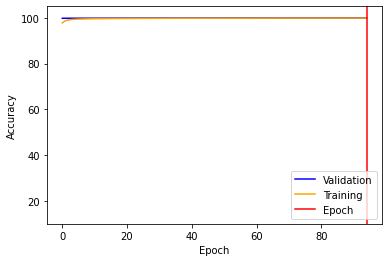

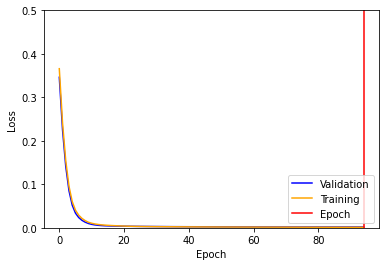

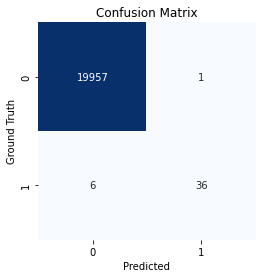

              precision    recall  f1-score   support

    no fraud       1.00      1.00      1.00     19958
       fraud       0.97      0.86      0.91        42

    accuracy                           1.00     20000
   macro avg       0.99      0.93      0.96     20000
weighted avg       1.00      1.00      1.00     20000

AUC fraud : 0.929


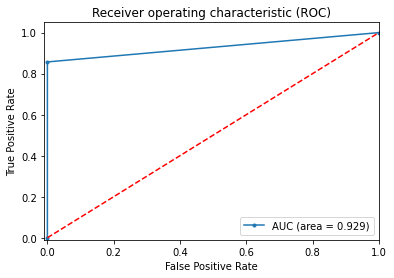

f1: 0.911  auc: 0.915


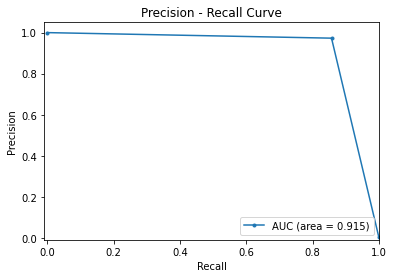

0.9285463759609466

In [ ]:
batch_size = 10
b = DNN_Model(X_train, y_train, X_test, y_test, 0.2, 165, math.ceil(len(X_train) / batch_size), 0.001, DNN1,deviceR, 10)
b.train()
b.test()
b.plot_Accuracy_Loss_Training_Curves()
b.plot_Confusion_Matrix()
b.ROC_Curve()
b.PRC_Curve()
b.best_epoch
b.accuracy_array_train
b.roc_auc_DNN

### V

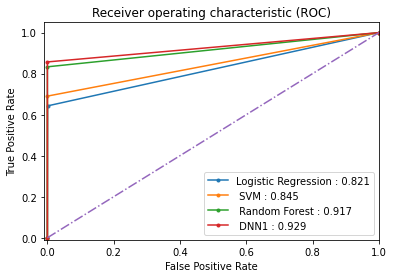

In [ ]:
AUROC_logisticRegression = roc_auc_score(logisticRegression.y_test, logisticRegression.predicted)
fpr_logisticRegression, tpr_logisticRegression, _ = roc_curve(logisticRegression.y_test, logisticRegression.predicted)
 
AUROC_SVM = roc_auc_score(SVM.y_test, SVM.predicted)
fpr_SVM, tpr_SVM, _ = roc_curve(SVM.y_test, SVM.predicted)

AUROC_RF = roc_auc_score(RF.y_test, RF.predicted)
fpr_RF, tpr_RF, _ = roc_curve(RF.y_test, RF.predicted)

AUROC_DNN1 = roc_auc_score(b.y_test, b.predicted)
fpr_DNN1, tpr_DNN1, _ = roc_curve(b.y_test, b.predicted)
    
plt.figure()
plt.title('Receiver operating characteristic (ROC)')
plt.plot(fpr_logisticRegression, tpr_logisticRegression, label=f'Logistic Regression : {AUROC_logisticRegression:.3f}', marker = '.')
plt.plot(fpr_SVM, tpr_SVM, label=f' SVM : {AUROC_SVM:.3f}', marker = '.')
plt.plot(fpr_RF, tpr_RF, label=f' Random Forest : {AUROC_RF:.3f}', marker = '.')
plt.plot(fpr_DNN1, tpr_DNN1, label=f' DNN1 : {AUROC_DNN1:.3f}', marker = '.')


plt.plot([0,1],[0,1],'-.')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

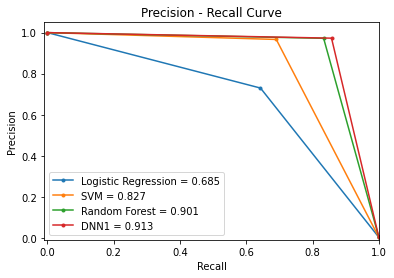

In [ ]:
precision_logisticRegression, recall_logisticRegression, _ = precision_recall_curve(logisticRegression.y_test, logisticRegression.predicted)
f1_logisticRegression, auc_logisticRegression = f1_score(logisticRegression.y_test, logisticRegression.predicted), auc(precision_logisticRegression, recall_logisticRegression)

precision_SVM, recall_SVM, _ = precision_recall_curve(SVM.y_test, SVM.predicted)
f1_SVM, auc_SVM = f1_score(SVM.y_test, SVM.predicted), auc(precision_SVM, recall_SVM)

precision_RF, recall_RF, _ = precision_recall_curve(RF.y_test, RF.predicted)
f1_RF, auc_RF = f1_score(RF.y_test, RF.predicted), auc(precision_RF, recall_RF)


precision_DNN1, recall_DNN1, _ = precision_recall_curve(b.y_test, b.predicted)
f1_DNN1, auc_DNN1 = f1_score(b.y_test, b.predicted), auc(precision_DNN1, recall_DNN1)
    

plt.figure()
plt.title('Precision - Recall Curve')
plt.plot(recall_logisticRegression, precision_logisticRegression, label=f'Logistic Regression = {auc_logisticRegression:.3f}', marker = '.')
plt.plot(recall_SVM, precision_SVM, label=f'SVM = {auc_SVM:.3f}', marker = '.')
plt.plot(recall_RF, precision_RF, label=f'Random Forest = {auc_RF:.3f}', marker = '.')
plt.plot(recall_DNN1, precision_DNN1, label=f'DNN1 = {auc_DNN1:.3f}', marker = '.')


plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower left")
plt.show()

# VII

### Over-Sampling 

In [80]:
X_Otrain, y_Otrain = RandomOverSampler(random_state=42).fit_resample(X_train, y_train)

Train Dataset ->  fraud : 79818 -> 50.0% non-fraud :79818 50.0%
Test Dataset  ->  fraud : 42 -> 0.21% non-fraud : 19958 99.79%


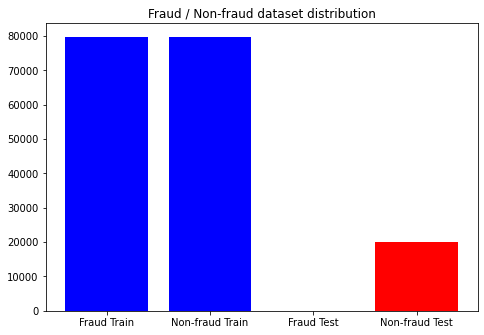

In [81]:
# verify percentage of fraud
train_fraud_percentage = percentage_fraud_nonFraud(y_Otrain)
test_fraud_percentage = percentage_fraud_nonFraud(y_test)

print(f'Train Dataset ->  fraud : {train_fraud_percentage[2]} -> {train_fraud_percentage[0]}% non-fraud :{train_fraud_percentage[3]} {train_fraud_percentage[1]}%')
print(f'Test Dataset  ->  fraud : {test_fraud_percentage[2]} -> {test_fraud_percentage[0]}% non-fraud : {test_fraud_percentage[3]} {test_fraud_percentage[1]}%')

plot_datasetBars(y_Otrain, y_test)

accuracy = 97.81%


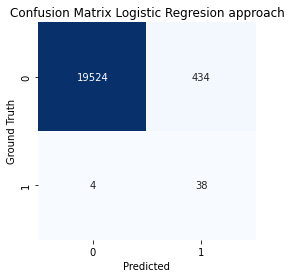

              precision    recall  f1-score   support

    no fraud       1.00      0.98      0.99     19958
       fraud       0.08      0.90      0.15        42

    accuracy                           0.98     20000
   macro avg       0.54      0.94      0.57     20000
weighted avg       1.00      0.98      0.99     20000



In [82]:
logisticRegressionO = Logistic_Regresion(X_Otrain, y_Otrain, X_test, y_test)

accuracy = 98.32%


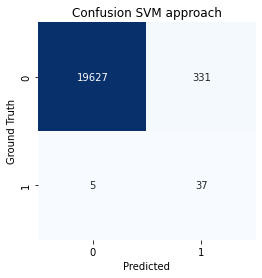

              precision    recall  f1-score   support

    no fraud       1.00      0.98      0.99     19958
       fraud       0.10      0.88      0.18        42

    accuracy                           0.98     20000
   macro avg       0.55      0.93      0.59     20000
weighted avg       1.00      0.98      0.99     20000



In [83]:
SVMO = Support_Vector_Machine(X_Otrain, y_Otrain, X_test, y_test)

accuracy = 99.96%


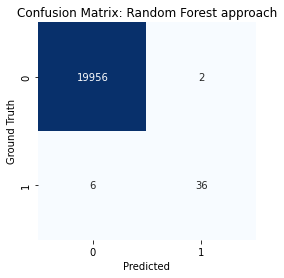

              precision    recall  f1-score   support

    no fraud       1.00      1.00      1.00     19958
       fraud       0.95      0.86      0.90        42

    accuracy                           1.00     20000
   macro avg       0.97      0.93      0.95     20000
weighted avg       1.00      1.00      1.00     20000



In [84]:
RFO = Random_Forest(X_Otrain, y_Otrain, X_test, y_test)

epoch [1/1000], step [1/8], Training Loss:0.443145, Training Accuracy: 99.57404159358558
epoch [1/1000], step [2/8], Training Loss:0.424219, Training Accuracy: 99.63355048859935
epoch [1/1000], step [3/8], Training Loss:0.404556, Training Accuracy: 99.65129875553328
epoch [1/1000], step [4/8], Training Loss:0.386889, Training Accuracy: 99.67270107742421
epoch [1/1000], step [5/8], Training Loss:0.368145, Training Accuracy: 99.7018291155099
epoch [1/1000], step [6/8], Training Loss:1.91845, Training Accuracy: 83.27173640691556
epoch [1/1000], step [7/8], Training Loss:1.84891, Training Accuracy: 71.37577406307048
epoch [1/1000], step [8/8], Training Loss:1.72561, Training Accuracy: 62.45624750405224
epoch [1/1000], step [1/8], Validation Loss:1.58589, Validation Accuracy: 0.0
epoch [2/1000], step [1/8], Training Loss:0.356743, Training Accuracy: 66.60564762547764
epoch [2/1000], step [2/8], Training Loss:0.361012, Training Accuracy: 69.91950386819933
epoch [2/1000], step [3/8], Training

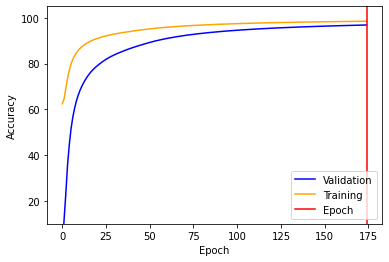

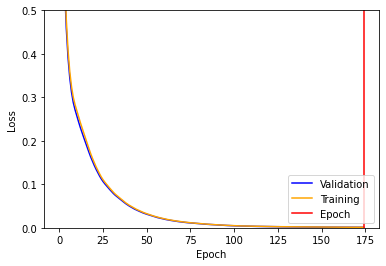

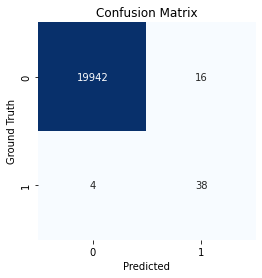

              precision    recall  f1-score   support

    no fraud       1.00      1.00      1.00     19958
       fraud       0.70      0.90      0.79        42

    accuracy                           1.00     20000
   macro avg       0.85      0.95      0.90     20000
weighted avg       1.00      1.00      1.00     20000

AUC fraud : 0.952


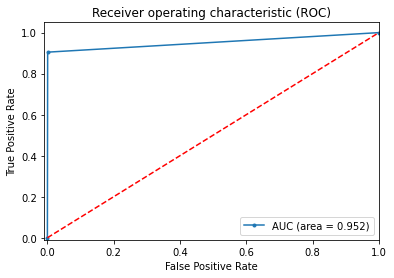

f1: 0.792  auc: 0.804


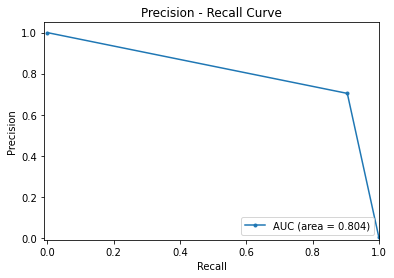

0.9519801106132401

In [85]:
batch_size = 10
bO = DNN_Model(X_Otrain, y_Otrain, X_test, y_test, 0.2, 1000, math.ceil(len(X_Otrain) / batch_size), 0.001, DNN1,deviceR, 2)
bO.train()
bO.test()
bO.plot_Accuracy_Loss_Training_Curves()
bO.plot_Confusion_Matrix()
bO.ROC_Curve()
bO.PRC_Curve()
bO.best_epoch
bO.accuracy_array_train
bO.roc_auc_DNN

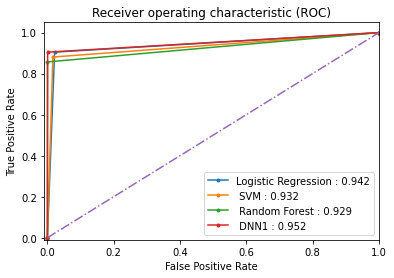

In [87]:
AUROC_logisticRegressionO = roc_auc_score(logisticRegressionO.y_test, logisticRegressionO.predicted)
fpr_logisticRegressionO, tpr_logisticRegressionO, _ = roc_curve(logisticRegressionO.y_test, logisticRegressionO.predicted)
 
AUROC_SVMO = roc_auc_score(SVMO.y_test, SVMO.predicted)
fpr_SVMO, tpr_SVMO, _ = roc_curve(SVMO.y_test, SVMO.predicted)

AUROC_RFO = roc_auc_score(RFO.y_test, RFO.predicted)
fpr_RFO, tpr_RFO, _ = roc_curve(RFO.y_test, RFO.predicted)

AUROC_DNN1O = roc_auc_score(bO.y_test, bO.predicted)
fpr_DNN1O, tpr_DNN1O, _ = roc_curve(bO.y_test, bO.predicted)


    
plt.figure()
plt.title('Receiver operating characteristic (ROC)')
plt.plot(fpr_logisticRegressionO, tpr_logisticRegressionO, label=f'Logistic Regression : {AUROC_logisticRegressionO:.3f}', marker = '.')
plt.plot(fpr_SVMO, tpr_SVMO, label=f' SVM : {AUROC_SVMO:.3f}', marker = '.')
plt.plot(fpr_RFO, tpr_RFO, label=f' Random Forest : {AUROC_RFO:.3f}', marker = '.')
plt.plot(fpr_DNN1O, tpr_DNN1O, label=f' DNN1 : {AUROC_DNN1O:.3f}', marker = '.')



plt.plot([0,1],[0,1],'-.')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

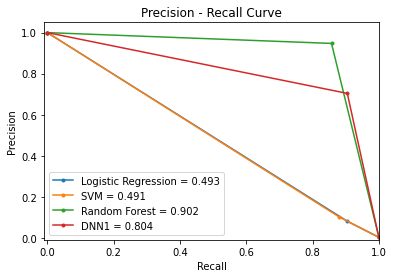

In [88]:
precision_logisticRegressionO, recall_logisticRegressionO, _ = precision_recall_curve(logisticRegressionO.y_test, logisticRegressionO.predicted)
f1_logisticRegressionO, auc_logisticRegressionO = f1_score(logisticRegressionO.y_test, logisticRegressionO.predicted), auc(recall_logisticRegressionO, precision_logisticRegressionO)

precision_SVMO, recall_SVMO, _ = precision_recall_curve(SVMO.y_test, SVMO.predicted)
f1_SVMO, auc_SVMO = f1_score(SVMO.y_test, SVMO.predicted), auc(recall_SVMO, precision_SVMO)

precision_RFO, recall_RFO, _ = precision_recall_curve(RFO.y_test, RFO.predicted)
f1_RFO, auc_RFO = f1_score(RFO.y_test, RFO.predicted), auc(recall_RFO, precision_RFO)
    
precision_DNN1O, recall_DNN1O, _ = precision_recall_curve(bO.y_test, bO.predicted)
f1_DNN1O, auc_DNN1O = f1_score(bO.y_test, bO.predicted), auc(recall_DNN1O, precision_DNN1O)



plt.figure()
plt.title('Precision - Recall Curve')
plt.plot(recall_logisticRegressionO, precision_logisticRegressionO, label=f'Logistic Regression = {auc_logisticRegressionO:.3f}', marker = '.')
plt.plot(recall_SVMO, precision_SVMO, label=f'SVM = {auc_SVMO:.3f}', marker = '.')
plt.plot(recall_RFO, precision_RFO, label=f'Random Forest = {auc_RFO:.3f}', marker = '.')
plt.plot(recall_DNN1O, precision_DNN1O, label=f'DNN1 = {auc_DNN1O:.3f}', marker = '.')


plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower left")
plt.show()

### Under-Sampling

In [89]:
X_Utrain, y_Utrain = RandomUnderSampler(random_state=42).fit_resample(X_train, y_train)

Train Dataset ->  fraud : 181 -> 50.0% non-fraud :181 50.0%
Test Dataset  ->  fraud : 42 -> 0.21% non-fraud : 19958 99.79%


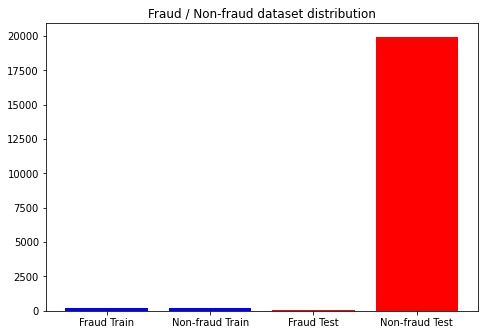

In [90]:
# verify percentage of fraud
train_fraud_percentage = percentage_fraud_nonFraud(y_Utrain)
test_fraud_percentage = percentage_fraud_nonFraud(y_test)

print(f'Train Dataset ->  fraud : {train_fraud_percentage[2]} -> {train_fraud_percentage[0]}% non-fraud :{train_fraud_percentage[3]} {train_fraud_percentage[1]}%')
print(f'Test Dataset  ->  fraud : {test_fraud_percentage[2]} -> {test_fraud_percentage[0]}% non-fraud : {test_fraud_percentage[3]} {test_fraud_percentage[1]}%')


plot_datasetBars(y_Utrain, y_test)


accuracy = 95.71%


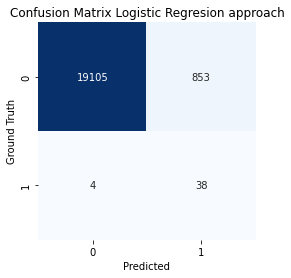

              precision    recall  f1-score   support

    no fraud       1.00      0.96      0.98     19958
       fraud       0.04      0.90      0.08        42

    accuracy                           0.96     20000
   macro avg       0.52      0.93      0.53     20000
weighted avg       1.00      0.96      0.98     20000



In [92]:
logisticRegressionU = Logistic_Regresion(X_Utrain, y_Utrain, X_test, y_test)

accuracy = 99.44%


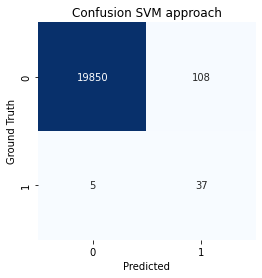

              precision    recall  f1-score   support

    no fraud       1.00      0.99      1.00     19958
       fraud       0.26      0.88      0.40        42

    accuracy                           0.99     20000
   macro avg       0.63      0.94      0.70     20000
weighted avg       1.00      0.99      1.00     20000



In [68]:
SVMU = Support_Vector_Machine(X_Utrain, y_Utrain, X_test, y_test)

accuracy = 98.36%


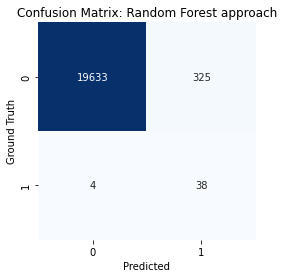

              precision    recall  f1-score   support

    no fraud       1.00      0.98      0.99     19958
       fraud       0.10      0.90      0.19        42

    accuracy                           0.98     20000
   macro avg       0.55      0.94      0.59     20000
weighted avg       1.00      0.98      0.99     20000



In [93]:
RFU = Random_Forest(X_Utrain, y_Utrain, X_test, y_test)

epoch [1/1000], step [1/8], Training Loss:0.858997, Training Accuracy: 0.0
epoch [1/1000], step [2/8], Training Loss:0.944202, Training Accuracy: 1.3513513513513513
epoch [1/1000], step [3/8], Training Loss:0.860543, Training Accuracy: 2.7027027027027026
epoch [1/1000], step [4/8], Training Loss:0.807096, Training Accuracy: 5.405405405405405
epoch [1/1000], step [5/8], Training Loss:0.754627, Training Accuracy: 7.027027027027027
epoch [1/1000], step [6/8], Training Loss:0.47025, Training Accuracy: 20.27027027027027
epoch [1/1000], step [7/8], Training Loss:0.445136, Training Accuracy: 29.72972972972973
epoch [1/1000], step [8/8], Training Loss:0.45015, Training Accuracy: 34.72222222222222
epoch [1/1000], step [1/8], Validation Loss:0.426168, Validation Accuracy: 89.04109589041096
epoch [2/1000], step [1/8], Training Loss:0.744882, Training Accuracy: 32.92307692307692
epoch [2/1000], step [2/8], Training Loss:0.785201, Training Accuracy: 32.59668508287293
epoch [2/1000], step [3/8], Tra

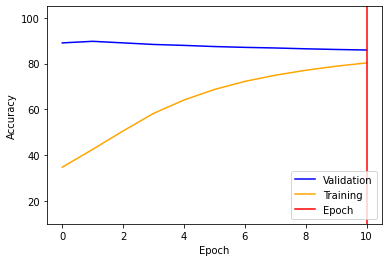

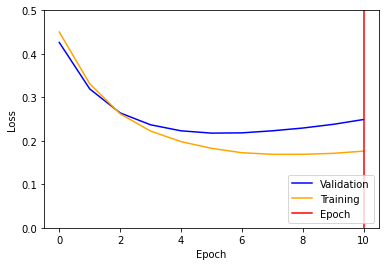

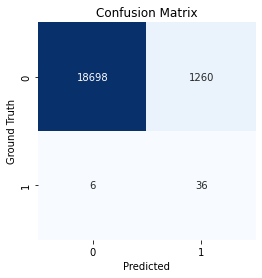

              precision    recall  f1-score   support

    no fraud       1.00      0.94      0.97     19958
       fraud       0.03      0.86      0.05        42

    accuracy                           0.94     20000
   macro avg       0.51      0.90      0.51     20000
weighted avg       1.00      0.94      0.97     20000

AUC fraud : 0.897


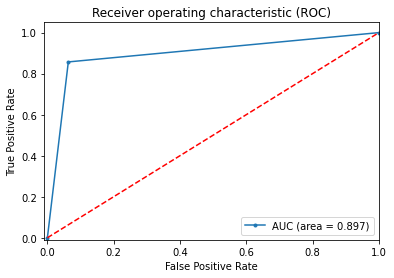

f1: 0.054  auc: 0.443


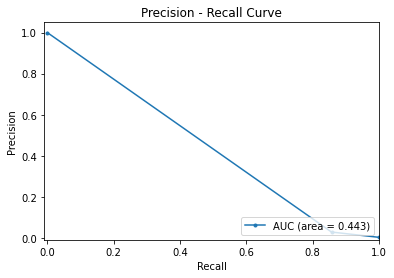

0.8970051393640932

In [94]:
batch_size = 10
bU = DNN_Model(X_Utrain, y_Utrain, X_test, y_test, 0.2, 1000, math.ceil(len(X_Utrain) / batch_size), 0.001, DNN1,deviceR, 5)
bU.train()
bU.test()
bU.plot_Accuracy_Loss_Training_Curves()
bU.plot_Confusion_Matrix()
bU.ROC_Curve()
bU.PRC_Curve()
bU.best_epoch
bU.accuracy_array_train
bU.roc_auc_DNN

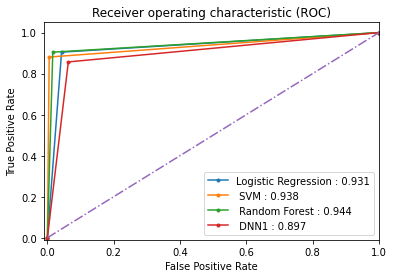

In [95]:
AUROC_logisticRegressionU = roc_auc_score(logisticRegressionU.y_test, logisticRegressionU.predicted)
fpr_logisticRegressionU, tpr_logisticRegressionU, _ = roc_curve(logisticRegressionU.y_test, logisticRegressionU.predicted)
 
AUROC_SVMU = roc_auc_score(SVMU.y_test, SVMU.predicted)
fpr_SVMU, tpr_SVMU, _ = roc_curve(SVMU.y_test, SVMU.predicted)

AUROC_RFU = roc_auc_score(RFU.y_test, RFU.predicted)
fpr_RFU, tpr_RFU, _ = roc_curve(RFU.y_test, RFU.predicted)

AUROC_DNN1U = roc_auc_score(bU.y_test, bU.predicted)
fpr_DNN1U, tpr_DNN1U, _ = roc_curve(bU.y_test, bU.predicted)


    
plt.figure()
plt.title('Receiver operating characteristic (ROC)')
plt.plot(fpr_logisticRegressionU, tpr_logisticRegressionU, label=f'Logistic Regression : {AUROC_logisticRegressionU:.3f}', marker = '.')
plt.plot(fpr_SVMU, tpr_SVMU, label=f' SVM : {AUROC_SVMU:.3f}', marker = '.')
plt.plot(fpr_RFU, tpr_RFU, label=f' Random Forest : {AUROC_RFU:.3f}', marker = '.')
plt.plot(fpr_DNN1U, tpr_DNN1U, label=f' DNN1 : {AUROC_DNN1U:.3f}', marker = '.')


plt.plot([0,1],[0,1],'-.')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

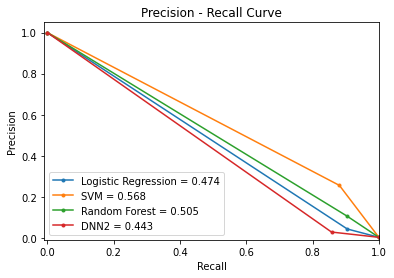

In [96]:
precision_logisticRegressionU, recall_logisticRegressionU, _ = precision_recall_curve(logisticRegressionU.y_test, logisticRegressionU.predicted)
f1_logisticRegressionU, auc_logisticRegressionU = f1_score(logisticRegressionU.y_test, logisticRegressionU.predicted), auc(recall_logisticRegressionU, precision_logisticRegressionU)

precision_SVMU, recall_SVMU, _ = precision_recall_curve(SVMU.y_test, SVMU.predicted)
f1_SVMU, auc_SVMU = f1_score(SVMU.y_test, SVMU.predicted), auc(recall_SVMU, precision_SVMU)

precision_RFU, recall_RFU, _ = precision_recall_curve(RFU.y_test, RFU.predicted)
f1_RFU, auc_RFU = f1_score(RFU.y_test, RFU.predicted), auc(recall_RFU, precision_RFU)
    
precision_DNN1U, recall_DNN1U, _ = precision_recall_curve(bU.y_test, bU.predicted)
f1_DNN1U, auc_DNN1U = f1_score(bU.y_test, bU.predicted), auc(recall_DNN1U, precision_DNN1U )



plt.figure()
plt.title('Precision - Recall Curve')
plt.plot(recall_logisticRegressionU, precision_logisticRegressionU, label=f'Logistic Regression = {auc_logisticRegressionU:.3f}', marker = '.')
plt.plot(recall_SVMU, precision_SVMU, label=f'SVM = {auc_SVMU:.3f}', marker = '.')
plt.plot(recall_RFU, precision_RFU, label=f'Random Forest = {auc_RFU:.3f}', marker = '.')
plt.plot(recall_DNN1U, precision_DNN1U, label=f'DNN2 = {auc_DNN1U:.3f}', marker = '.')


plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower left")
plt.show()

#  VIII

Reduced Focal Loss (RFL)

In [ ]:
class FocalLoss(nn.Module):
    def __init__(self, threshold = 0.5, gamma = 2, device = 'cpu', _device_ = None, reduction= None):
        super(FocalLoss, self).__init__()
        self.threshold = threshold
        self.gamma = 2
        self.device = device
        self._device_ = _device_
        self.reduction = reduction
            
    def forward(self, input, target):
        BCE_loss = nn.functional.binary_cross_entropy(input, target)
        log_pt = - BCE_loss
        pt = torch.exp(log_pt)
        
        low_th_weight = torch.ones_like(pt)
        high_th_weight = (1 - pt) ** self.gamma / (self.threshold) ** self.gamma
        weights = torch.where(pt < self.threshold, low_th_weight, high_th_weight)

        rfl = weights * BCE_loss

        if self.reduction == "sum":
            rfl = rfl.sum()
        elif self.reduction == "mean":
            rfl = rfl.mean()
        else:
            raise ValueError(f"reduction '{self.reduction}' is not valid")
        return rfl


In [ ]:
class DNNT(nn.Module):
    def __init__(self, input_size, num_classes):
        super(DNNT, self).__init__()
        self.input_size = input_size
        # hidden layer 1
        
        self.l1 = nn.Linear(input_size, 32)
        self.norm1 = nn.BatchNorm1d(32)
        self.act1 = nn.ReLU()
        self.drop1 = nn.Dropout(p=0.3)
        # hidden layer 2
        self.l2 = nn.Linear(32, 16)
        self.norm2 = nn.BatchNorm1d(16)
        self.act2 = nn.ReLU()
        self.drop2 = nn.Dropout(p=0.3)
        # hidden layer 3
        self.l3 = nn.Linear(16, num_classes)
        self.act_out = nn.Sigmoid()
        
        nn.init.xavier_normal_(self.l1.weight)
        nn.init.xavier_normal_(self.l2.weight)
        nn.init.xavier_normal_(self.l3.weight)
       
    
    def forward(self, x):
        out = self.l1(x)
        out = self.norm1(out)
        out = self.act1(out)
        out = self.drop1(out)
        
        out = self.l2(out)
        out = self.norm2(out)
        out = self.act2(out)
        out = self.drop2(out)
        
        out = self.l3(out)
        out = self.act_out(out)
        
        return out

In [140]:
class DNN_Model_():
    def __init__(self, X_train, y_train, X_test, y_test, validation_percentage, epochs, batch_size, learning_rate, dnnModel, device, patience = 2 ):
        self.device = torch.device('cuda' if torch.cuda.is_available else 'cpu')
        self.device_test = device
        
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.patience = patience
        
        validation = math.ceil(len(X_train) * validation_percentage)
        x_lim = len(X_train) - validation
        
        self.X_train  = X_train[:x_lim - 1, :]
        self.y_train  = y_train[:x_lim - 1].reshape((len(self.X_train),1))
        
        self.X_validation = X_train[x_lim:, :]
        self.y_validation = y_train[x_lim:].reshape((len(self.X_validation),1))
        
        self.X_test = X_test
        self.y_test = y_test.reshape((len(self.X_test),1))
        
        self.train_dataset = self.datasetPreparation(self.X_train, self.y_train)
        self.test_dataset = self.datasetPreparation(self.X_test, self.y_test)
        self.validation_dataset = self.datasetPreparation(self.X_validation, self.y_validation)
        
        self.train_loader = DataLoader(dataset = self.train_dataset, batch_size = self.batch_size, shuffle = True)
        self.validation_loader = DataLoader(dataset = self.validation_dataset, batch_size =len(self.y_validation), shuffle = True)
        self.test_loader = DataLoader(dataset = self.test_dataset, batch_size = len(self.y_test), shuffle = False)
        
        self.model = self.load_model(dnnModel)
        self.criterion = FocalLoss(threshold = 0.07262, gamma = 2, reduction='mean')  #threshold = 0.07262
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate) 
    
    
        
    class datasetPreparation(Dataset):
        def __init__(self, inputs, labels):
            self.X, self.y = self.ToTensor(inputs, labels)
            self.n_samples, self.n_features = inputs.shape
        
        def ToTensor(self, inputs, targets):
            return torch.from_numpy(inputs), torch.from_numpy(targets).to(torch.float32)
    
        def __getitem__(self, index):
            return self.X[index], self.y[index]
    
        def __len__(self):
            return self.n_samples
        
        
    def load_model(self, dnnModel):
        if self.device_test == 'gpu':
            return dnnModel(self.train_dataset.n_features, 1).to(self.device)
        elif self.device_test == 'cpu' :
            return dnnModel(self.train_dataset.n_features,  1)
        
        
    def train(self):
        self.epoch_array_train = []
        self.accuracy_array_train = []
        self.loss_array_train = []
        self.accuracy_array_validation = []
        self.loss_array_validation = []
        
        n_samples = 0
        n_correct = 0
        
        n_samples_validation =  0
        n_correct_validation = 0
        
        best_model = copy.deepcopy(self.model.state_dict())
        best_loss = 100.0
        counter = 0
        
    
        for epoch in range(self.epochs):
            
            # =======================================================================================================
            # TRAINING STAGE
            # =======================================================================================================
            current_loss_training = 0.0
            current_acc_training = 0.0
            
            self.model.train() 
            
            for i, (inputs, labels) in enumerate(self.train_loader):
                
             
                if self.device_test == 'gpu':
                    inputs, labels = inputs.to(self.device), labels.to(self.device)
    
                
                # forward
                outputs = self.model(inputs)

                loss = self.criterion(outputs, labels)
                
                # Backward and optimize
                loss.backward()
                self.optimizer.step()
                self.optimizer.zero_grad()
                
                predicted = outputs.cpu().detach().numpy()
                predicted[predicted >= 0.5] = 1.0
                predicted[predicted < 0.5] = 0.0
                
                ground_truth = labels.cpu().detach().numpy()
    
                n_samples += len(inputs)
                n_correct +=  (predicted == ground_truth).sum().item()
                accuracy_ = (n_correct / n_samples) * 100
                    
                current_acc_training = accuracy_
                current_loss_training = loss.item()
                
                if (i+2)%1==0:
                    print(f'epoch [{epoch + 1}/{self.epochs}], step [{i + 1}/{len(self.train_loader)}], Training Loss:{loss.item():.6}, Training Accuracy: {accuracy_}')
                
                
            # keep accuracy and loss while trainig
            self.accuracy_array_train.append(current_acc_training)
            self.loss_array_train.append(current_loss_training)
            
            # =======================================================================================================
            # Evaluation
            # =======================================================================================================
                    
            current_loss_validation = 0.0
            current_acc_validation = 0.0
            
            self.model.eval()
            with torch.no_grad():
                for i, (inputs, labels) in enumerate(self.validation_loader):
                
                    if self.device_test == 'gpu':
                        inputs, labels = inputs.to(self.device), labels.to(self.device)
                
                    labels_ = nn.functional.one_hot(labels.to(torch.int64), num_classes= 2).to(torch.float32)
                    # forward
                    outputs = self.model(inputs)
                
                    # loss1 = self.Cross_Entropy(outputs, labels)
                    loss = self.criterion(outputs, labels)
                
                    predicted = outputs.cpu().detach().numpy()
                    predicted[predicted >= 0.5] = 1.0
                    predicted[predicted < 0.5] = 0.0
                
                    ground_truth = labels.cpu().detach().numpy()
                
                    n_samples_validation += len(inputs)
                    
                    n_correct_validation += (predicted == ground_truth).sum().item()
                
                    accuracy_ = (n_correct_validation / n_samples_validation) * 100
                
                    current_loss_validation = loss.item()
                    current_acc_validation = accuracy_
                
                    print(f'epoch [{epoch + 1}/{self.epochs}], step [{i + 1}/{len(self.train_loader)}], Validation Loss:{loss.item():.6}, Validation Accuracy: {accuracy_}')
                
                
                # keep accuracy and loss while trainig
                self.accuracy_array_validation.append(current_acc_validation)
                self.loss_array_validation.append(current_loss_validation)
                
                
                
                if current_loss_validation != 0:
                  
                    if best_loss > current_loss_validation:
                        best_loss = current_loss_validation
                        best_model = copy.deepcopy(self.model.state_dict())
                        self.best_epoch = epoch
                        
    
                        counter = 0
                    else:
                        counter += 1
                else:

                    counter += 1

                if counter>= self.patience:
                    self.model.load_state_dict(best_model)
                    self.best_epoch = epoch
                    return 
                       
                
        
    def test(self):
        n_correct = 0
        n_samples = 0
        self.accuracy_test = 0
        with torch.no_grad():
            for i, (inputs, labels) in enumerate(self.test_loader):
            
                if self.device_test == 'gpu':
                    inputs, labels = inputs.to(self.device), labels.to(self.device)
                
                outputs = self.model(inputs)
    
                predicted = outputs.cpu().detach().numpy()
                predicted[predicted >= 0.5] = 1.0
                predicted[predicted < 0.5] = 0.0
                ground_truth = labels.cpu().detach().numpy()

                n_samples += len(ground_truth)
                n_correct +=  (predicted == ground_truth).sum().item()
                
                self.predicted = predicted
                self.accuracy_test = (n_correct / n_samples) * 100
                
    
        print(f'Accuracy of the network on the {n_samples} test: {self.accuracy_test:.3f} %')
        
        
    def plot_Accuracy_Loss_Training_Curves(self):
        
        fig, ax = plt.subplots()
        ax.plot(self.accuracy_array_validation, label =f'Validation', color='b')
        ax.plot(self.accuracy_array_train, label =f'Training', color='orange')
        ax.axvline(x = self.best_epoch, color = 'r',  label = 'Epoch')
        ax.set(xlabel='Epoch', ylabel='Accuracy')
        ax.legend(loc="lower right")
        ax.set_ylim((10, 105))
        
        fig1, ax1 = plt.subplots()
        ax1.plot(self.loss_array_validation, label =f'Validation', color='b')
        ax1.plot( self.loss_array_train, label =f'Training', color='orange')
        ax1.axvline(x = self.best_epoch, color = 'r', label = 'Epoch')
        ax1.set(xlabel='Epoch', ylabel='Loss')
        ax1.legend(loc="lower right")
        ax1.set_ylim((0, 0.5))
        plt.show()
        
    def plot_Confusion_Matrix(self):
        labels = [0, 1]
        confusion_Matrix = confusion_matrix(self.y_test, self.predicted, labels= labels)
        sns.heatmap(confusion_Matrix, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
        xticklabels=labels, yticklabels=labels)
        plt.xlabel('Predicted')
        plt.ylabel('Ground Truth')
        plt.title(f"Confusion Matrix")
        plt.show()
#         
        self.test_Report()
        
    def test_Report(self):
        self.classification_report = classification_report( self.y_test, self.predicted, target_names=['no fraud', 'fraud'])
        print(self.classification_report)
        
    def ROC_Curve(self):
        self.roc_auc_DNN = roc_auc_score(self.y_test, self.predicted)
        print(f'AUC fraud : {self.roc_auc_DNN:.3f}')
        # false positive rate, true positive rate
        fpr, tpr, _ = roc_curve(self.y_test, self.predicted)
        
        plt.figure()
        plt.title('Receiver operating characteristic (ROC)')
        plt.plot(fpr, tpr, label=f'AUC (area = {self.roc_auc_DNN:.3f})', marker = '.')
        plt.plot([0,1],[0,1],'r--')
        plt.xlim([-0.01, 1.0])
        plt.ylim([-0.01, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc="lower right")
        plt.show()
        
    def PRC_Curve(self):
        precision_, recall_, _ = precision_recall_curve(self.y_test, self.predicted)
        f1, auc_ = f1_score(self.y_test, self.predicted), auc(recall_, precision_)
        print(f'f1: {f1:.3f}  auc: {auc_:.3f}')
        
        plt.figure()
        plt.title('Precision - Recall Curve')
        plt.plot(recall_, precision_, label=f'AUC (area = {auc_:.3f})', marker = '.')
        plt.xlim([-0.01, 1.0])
        plt.ylim([-0.01, 1.05])
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.legend(loc="lower right")
        plt.show()
        
    def model_summary(self):
        print(self.model)
        
  

self.FocalLoss(threshold = 0.07262, gamma = 2, reduction='mean')  

Streaming output truncated to the last 5000 lines.
epoch [234/1000], step [6/8], Training Loss:0.0330876, Training Accuracy: 98.30377737702257
epoch [234/1000], step [7/8], Training Loss:0.0327731, Training Accuracy: 98.30460381783665
epoch [234/1000], step [8/8], Training Loss:0.032287, Training Accuracy: 98.30539576156627
epoch [234/1000], step [1/8], Validation Loss:0.0325039, Validation Accuracy: 99.07305021367522
epoch [235/1000], step [1/8], Training Loss:0.0314268, Training Accuracy: 98.30622045589786
epoch [235/1000], step [2/8], Training Loss:0.0386968, Training Accuracy: 98.30697756573511
epoch [235/1000], step [3/8], Training Loss:0.0302813, Training Accuracy: 98.30779386983541
epoch [235/1000], step [4/8], Training Loss:0.0356622, Training Accuracy: 98.30860930364832
epoch [235/1000], step [5/8], Training Loss:0.034257, Training Accuracy: 98.30939056971143
epoch [235/1000], step [6/8], Training Loss:0.0351502, Training Accuracy: 98.31021094107564
epoch [235/1000], step [7/8

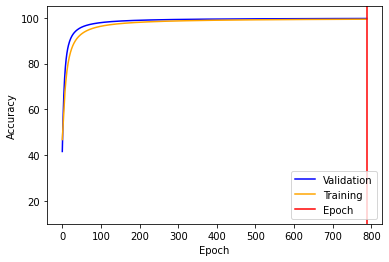

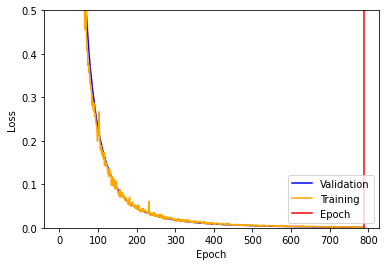

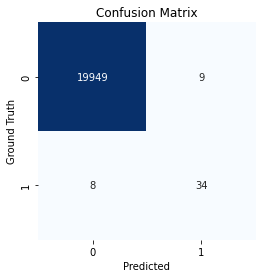

              precision    recall  f1-score   support

    no fraud       1.00      1.00      1.00     19958
       fraud       0.79      0.81      0.80        42

    accuracy                           1.00     20000
   macro avg       0.90      0.90      0.90     20000
weighted avg       1.00      1.00      1.00     20000

AUC fraud : 0.905


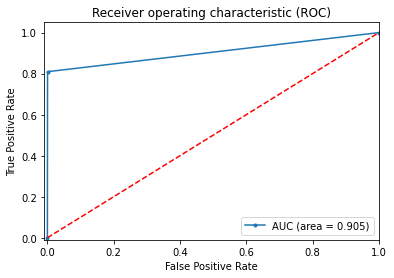

f1: 0.800  auc: 0.800


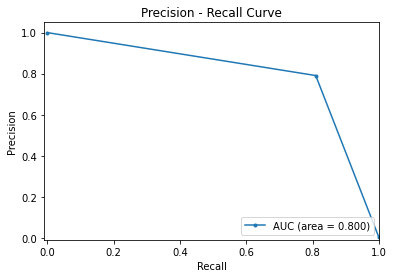

0.9045364312675667

In [ ]:
batch_size = 10
k1 = DNN_Model_(X_train, y_train, X_test, y_test, 0.2, 1000, math.ceil(len(X_train) / batch_size), 1e-3 ,DNNT,deviceR, 2)
k1.train()
k1.test()
k1.plot_Accuracy_Loss_Training_Curves()
k1.plot_Confusion_Matrix()
k1.ROC_Curve()
k1.PRC_Curve()
k1.best_epoch
k1.accuracy_array_train
k1.roc_auc_DNN

self.criterion = FocalLoss(threshold = 0.2, gamma = 5, reduction='mean')

epoch [1/1000], step [1/8], Training Loss:2.62525, Training Accuracy: 63.349999999999994
epoch [1/1000], step [2/8], Training Loss:2.4807, Training Accuracy: 64.03125
epoch [1/1000], step [3/8], Training Loss:2.32434, Training Accuracy: 64.57916666666667
epoch [1/1000], step [4/8], Training Loss:2.18071, Training Accuracy: 65.246875
epoch [1/1000], step [5/8], Training Loss:2.19691, Training Accuracy: 65.5675
epoch [1/1000], step [6/8], Training Loss:2.16436, Training Accuracy: 66.01875
epoch [1/1000], step [7/8], Training Loss:2.22323, Training Accuracy: 66.34642857142858
epoch [1/1000], step [8/8], Training Loss:1.98023, Training Accuracy: 66.79896246757711
epoch [1/1000], step [1/8], Validation Loss:2.30108, Validation Accuracy: 69.72500000000001
epoch [2/1000], step [1/8], Training Loss:2.08235, Training Accuracy: 67.3199255534876
epoch [2/1000], step [2/8], Training Loss:1.91378, Training Accuracy: 67.69419235480886
epoch [2/1000], step [3/8], Training Loss:1.7848, Training Accura

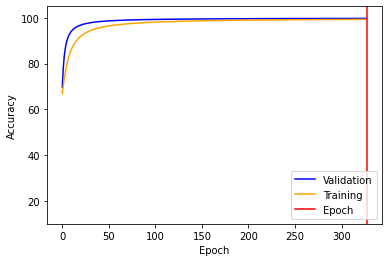

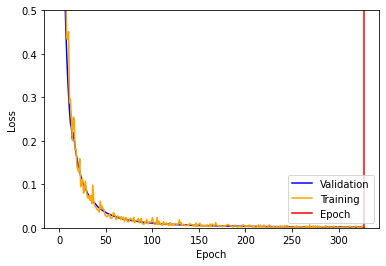

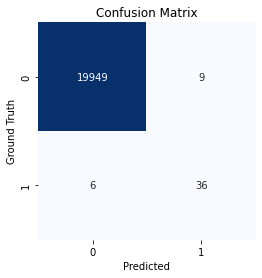

              precision    recall  f1-score   support

    no fraud       1.00      1.00      1.00     19958
       fraud       0.80      0.86      0.83        42

    accuracy                           1.00     20000
   macro avg       0.90      0.93      0.91     20000
weighted avg       1.00      1.00      1.00     20000

AUC fraud : 0.928


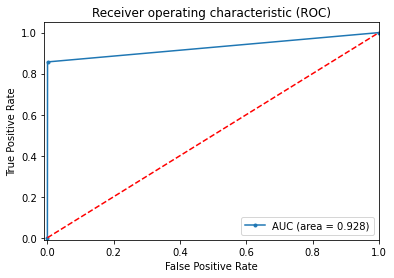

f1: 0.828  auc: 0.829


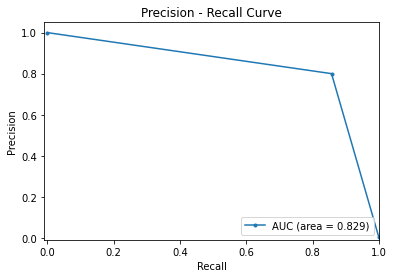

0.9283459550770905

In [141]:
batch_size = 10
km = DNN_Model_(X_train, y_train, X_test, y_test, 0.2, 1000, math.ceil(len(X_train) / batch_size), 1e-3 ,DNNT,deviceR, 2)
km.train()
km.test()
km.plot_Accuracy_Loss_Training_Curves()
km.plot_Confusion_Matrix()
km.ROC_Curve()
km.PRC_Curve()
km.best_epoch
km.accuracy_array_train
km.roc_auc_DNN

SMOTE

In [122]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
# transform the dataset
X_Strain, y_Strain = pipeline.fit_resample(X_train, y_train)


Train Dataset ->  fraud : 7981 -> 33.33% non-fraud :15962 66.67%
Test Dataset  ->  fraud : 42 -> 0.21% non-fraud : 19958 99.79%


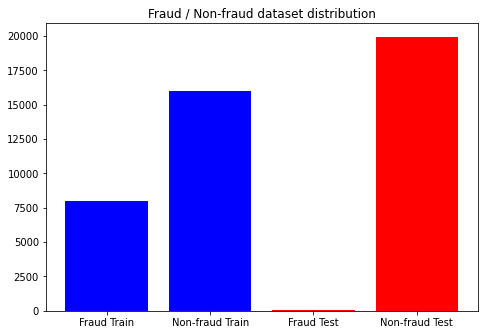

In [123]:
# verify percentage of fraud
train_fraud_percentage = percentage_fraud_nonFraud(y_Strain)
test_fraud_percentage = percentage_fraud_nonFraud(y_test)

print(f'Train Dataset ->  fraud : {train_fraud_percentage[2]} -> {train_fraud_percentage[0]}% non-fraud :{train_fraud_percentage[3]} {train_fraud_percentage[1]}%')
print(f'Test Dataset  ->  fraud : {test_fraud_percentage[2]} -> {test_fraud_percentage[0]}% non-fraud : {test_fraud_percentage[3]} {test_fraud_percentage[1]}%')

plot_datasetBars(y_Strain, y_test)


accuracy = 98.89%


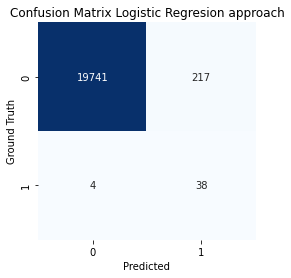

              precision    recall  f1-score   support

    no fraud       1.00      0.99      0.99     19958
       fraud       0.15      0.90      0.26        42

    accuracy                           0.99     20000
   macro avg       0.57      0.95      0.63     20000
weighted avg       1.00      0.99      0.99     20000



In [130]:
logisticRegressionS = Logistic_Regresion(X_Strain, y_Strain, X_test, y_test)

accuracy = 98.92%


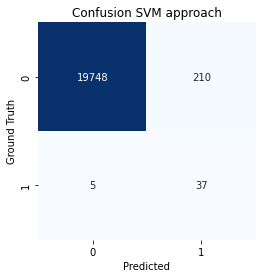

              precision    recall  f1-score   support

    no fraud       1.00      0.99      0.99     19958
       fraud       0.15      0.88      0.26        42

    accuracy                           0.99     20000
   macro avg       0.57      0.94      0.63     20000
weighted avg       1.00      0.99      0.99     20000



In [131]:
SVMS = Support_Vector_Machine(X_Strain, y_Strain, X_test, y_test)

accuracy = 99.9%


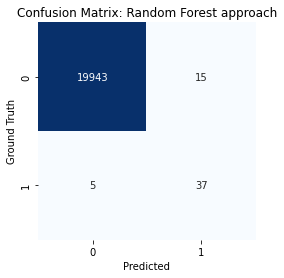

              precision    recall  f1-score   support

    no fraud       1.00      1.00      1.00     19958
       fraud       0.71      0.88      0.79        42

    accuracy                           1.00     20000
   macro avg       0.86      0.94      0.89     20000
weighted avg       1.00      1.00      1.00     20000



In [132]:
RFS = Random_Forest(X_Strain, y_Strain, X_test, y_test)

epoch [1/1000], step [1/8], Training Loss:0.525748, Training Accuracy: 98.66388308977035
epoch [1/1000], step [2/8], Training Loss:0.505096, Training Accuracy: 99.0187891440501
epoch [1/1000], step [3/8], Training Loss:0.486486, Training Accuracy: 99.30410577592205
epoch [1/1000], step [4/8], Training Loss:0.469412, Training Accuracy: 99.47807933194154
epoch [1/1000], step [5/8], Training Loss:0.448378, Training Accuracy: 99.5741127348643
epoch [1/1000], step [6/8], Training Loss:0.430498, Training Accuracy: 99.64509394572025
epoch [1/1000], step [7/8], Training Loss:1.40275, Training Accuracy: 94.90605427974947
epoch [1/1000], step [8/8], Training Loss:3.19511, Training Accuracy: 83.0731478097426
epoch [1/1000], step [1/8], Validation Loss:2.97925, Validation Accuracy: 0.0
epoch [2/1000], step [1/8], Training Loss:0.405984, Training Accuracy: 84.95452014108038
epoch [2/1000], step [2/8], Training Loss:0.402032, Training Accuracy: 86.4595079981623
epoch [2/1000], step [3/8], Training L

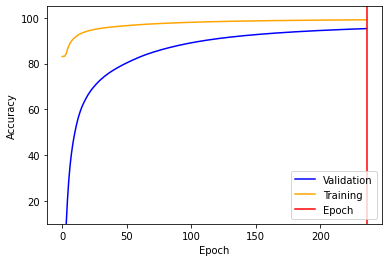

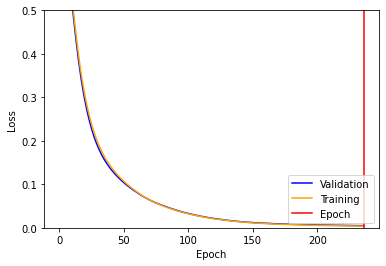

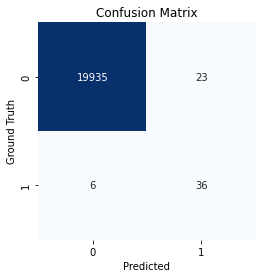

              precision    recall  f1-score   support

    no fraud       1.00      1.00      1.00     19958
       fraud       0.61      0.86      0.71        42

    accuracy                           1.00     20000
   macro avg       0.80      0.93      0.86     20000
weighted avg       1.00      1.00      1.00     20000

AUC fraud : 0.928


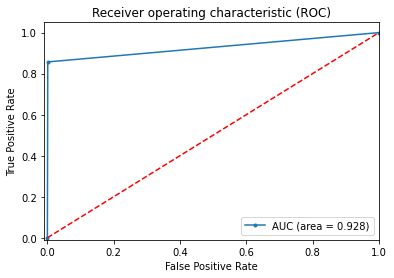

f1: 0.713  auc: 0.734


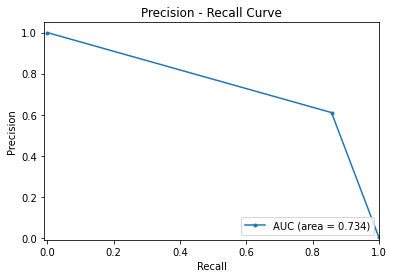

0.9279952185303423

In [133]:
batch_size = 10
bS = DNN_Model(X_Strain, y_Strain, X_test, y_test, 0.2, 1000, math.ceil(len(X_Strain) / batch_size), 0.001, DNN1,deviceR, 2)
bS.train()
bS.test()
bS.plot_Accuracy_Loss_Training_Curves()
bS.plot_Confusion_Matrix()
bS.ROC_Curve()
bS.PRC_Curve()
bS.best_epoch
bS.accuracy_array_train
bS.roc_auc_DNN

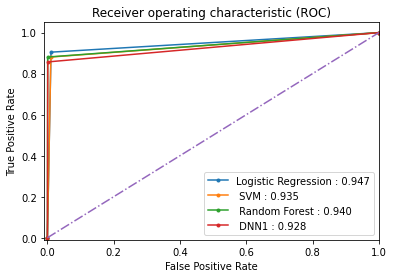

In [134]:
AUROC_logisticRegressionS = roc_auc_score(logisticRegressionS.y_test, logisticRegressionS.predicted)
fpr_logisticRegressionS, tpr_logisticRegressionS, _ = roc_curve(logisticRegressionS.y_test, logisticRegressionS.predicted)
 
AUROC_SVMS = roc_auc_score(SVMS.y_test, SVMS.predicted)
fpr_SVMS, tpr_SVMS, _ = roc_curve(SVMS.y_test, SVMS.predicted)

AUROC_RFS = roc_auc_score(RFS.y_test, RFS.predicted)
fpr_RFS, tpr_RFS, _ = roc_curve(RFS.y_test, RFS.predicted)

AUROC_DNN1S = roc_auc_score(bS.y_test, bS.predicted)
fpr_DNN1S, tpr_DNN1S, _ = roc_curve(bS.y_test, bS.predicted)

AUROC_DNNTS = roc_auc_score(bS.y_test, bS.predicted)
fpr_DNN1S, tpr_DNN1S, _ = roc_curve(bS.y_test, bS.predicted)


    
plt.figure()
plt.title('Receiver operating characteristic (ROC)')
plt.plot(fpr_logisticRegressionS, tpr_logisticRegressionS, label=f'Logistic Regression : {AUROC_logisticRegressionS:.3f}', marker = '.')
plt.plot(fpr_SVMS, tpr_SVMS, label=f' SVM : {AUROC_SVMS:.3f}', marker = '.')
plt.plot(fpr_RFS, tpr_RFS, label=f' Random Forest : {AUROC_RFS:.3f}', marker = '.')
plt.plot(fpr_DNN1S, tpr_DNN1S, label=f' DNN1 : {AUROC_DNN1S:.3f}', marker = '.')


plt.plot([0,1],[0,1],'-.')
plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

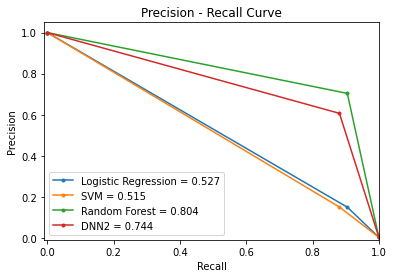

In [129]:
precision_logisticRegressionS, recall_logisticRegressionS, _ = precision_recall_curve(logisticRegressionS.y_test, logisticRegressionS.predicted)
f1_logisticRegressionS, auc_logisticRegressionS = f1_score(logisticRegressionS.y_test, logisticRegressionS.predicted), auc(recall_logisticRegressionS, precision_logisticRegressionS)

precision_SVMS, recall_SVMS, _ = precision_recall_curve(SVMS.y_test, SVMS.predicted)
f1_SVMS, auc_SVMS = f1_score(SVMS.y_test, SVMS.predicted), auc(recall_SVMS, precision_SVMS)

precision_RFS, recall_RFS, _ = precision_recall_curve(RFS.y_test, RFS.predicted)
f1_RFS, auc_RFS = f1_score(RFS.y_test, RFS.predicted), auc(recall_RFS, precision_RFS)
    
precision_DNN1S, recall_DNN1S, _ = precision_recall_curve(bS.y_test, bS.predicted)
f1_DNN1S, auc_DNN1S = f1_score(bS.y_test, bS.predicted), auc(recall_DNN1S, precision_DNN1S )



plt.figure()
plt.title('Precision - Recall Curve')
plt.plot(recall_logisticRegressionS, precision_logisticRegressionS, label=f'Logistic Regression = {auc_logisticRegressionS:.3f}', marker = '.')
plt.plot(recall_SVMS, precision_SVMS, label=f'SVM = {auc_SVMS:.3f}', marker = '.')
plt.plot(recall_RFS, precision_RFS, label=f'Random Forest = {auc_RFS:.3f}', marker = '.')
plt.plot(recall_DNN1S, precision_DNN1S, label=f'DNN2 = {auc_DNN1S:.3f}', marker = '.')


plt.xlim([-0.01, 1.0])
plt.ylim([-0.01, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower left")
plt.show()